<a href="https://colab.research.google.com/github/hoangvn111/Intermediate-SQL-for-Data-Analysis/blob/master/Intermediate_SQL_for_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import sqlite3

conn = sqlite3.connect('/content/drive/MyDrive/my_datasets/Intermediate SQL for Data Analysis/factbook-join.db')
print('Opened database succesfully')

Opened database succesfully


# Joining Data in SQL

In addition to the **facts** table we've added a new table, called **cities** which contains information on major urban areas from countries in the Factbook (for the rest of this mission, we'll use the word 'cities' to mean the same as 'major urban areas'). Let's take a look at the first few rows of this new table and a description of what each column represents:

In [3]:
import pandas as pd 

df = pd.read_sql_query('''SELECT *
                            FROM cities
                           LIMIT 5;''', conn)
df

,id,name,population,capital,facts_id
0,1,Oranjestad,37000,1,216
1,2,Saint John'S,27000,1,6
2,3,Abu Dhabi,942000,1,184
3,4,Dubai,1978000,0,184
4,5,Sharjah,983000,0,184


* id - A unique ID for each city.
* name - The name of the city.
* population - The population of the city.
* capital - Whether the city is a capital * city: 1 if it is, 0 if it isn't.
* facts_id - The ID of the country, from the facts table.

The last column is of particular interest to us, as it is a column of data that also exists in our original facts table. This link between tables is important as it's used to combine the data in our queries. Below is a **schema diagram**, which shows the two tables in our database, the columns within them and how the two are linked.

![](https://drive.google.com/drive/u/2/folders/1yumYL9GmWKgozI7_cghrLlT8Dsn57clk)

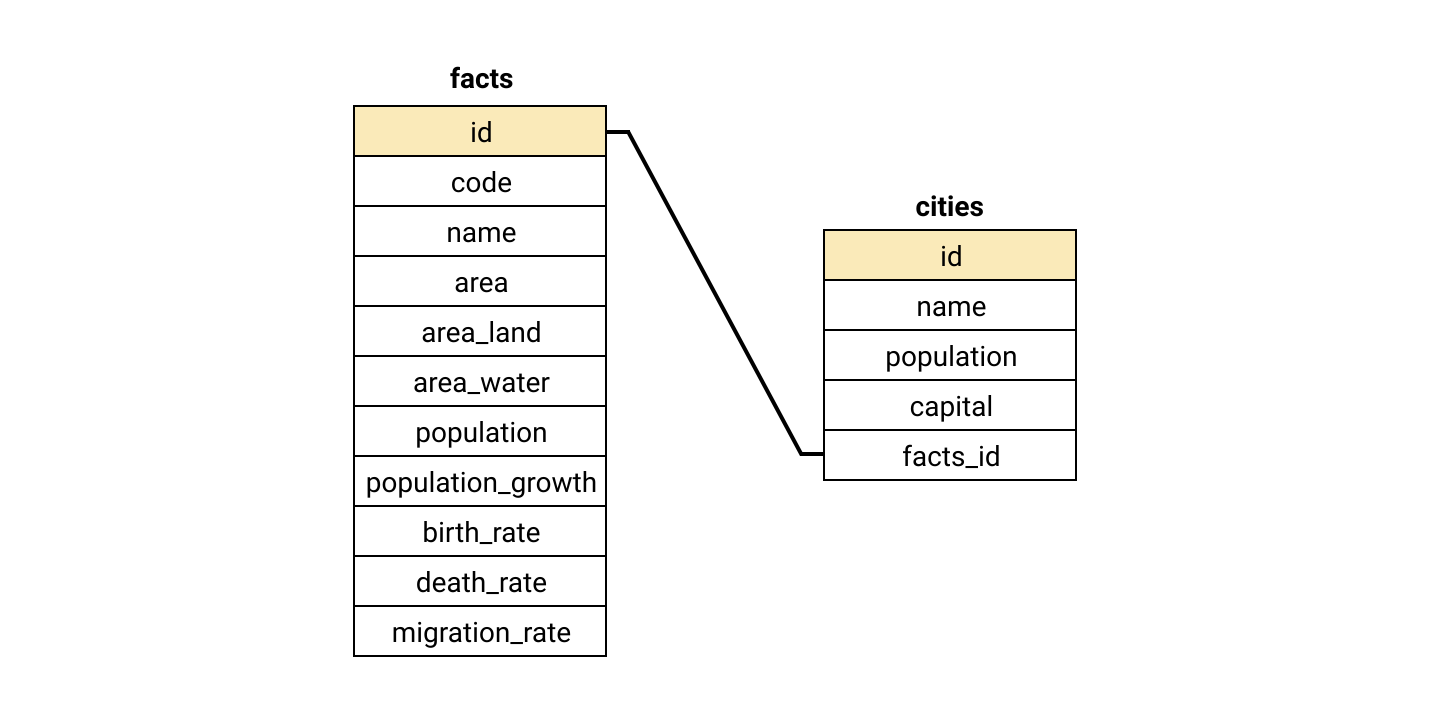

In [4]:
from IPython.display import SVG, display

def show_svg(file):
    display(SVG(filename=file))

show_svg('/content/drive/MyDrive/my_datasets/svg/schema.svg')



The most common way to join data using SQL is using an **inner join**. The syntax for an inner join is:
```
SELECT [column_names] FROM [table_name_one]
INNER JOIN [table_name_two] ON [join_constraint];
```
The inner join clause is made up of two parts:

* INNER JOIN, which tells the SQL engine the name of the table you wish to join in your query, and that you wish to use an inner join.
* ON, which tells the SQL engine what columns to use to join the two tables.

In [5]:
df = pd.read_sql_query('''SELECT * FROM facts
                          INNER JOIN cities ON cities.facts_id = facts.id
                          LIMIT 5''', conn)
df

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,id,name,population,capital,facts_id
0,216,aa,Aruba,180,180,0,112162,1.33,12.56,8.18,8.92,1,Oranjestad,37000,1,216
1,6,ac,Antigua and Barbuda,442,442,0,92436,1.24,15.85,5.69,2.21,2,Saint John'S,27000,1,6
2,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,3,Abu Dhabi,942000,1,184
3,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,4,Dubai,1978000,0,184
4,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,5,Sharjah,983000,0,184


Let's look at the line of the query with the join in it:

**INNER JOIN cities** - This tells the SQL engine that we wish to join the **cities** table to our query using an inner join.
**ON cities.facts_id = facts.id** - This tells the SQL engine which columns to use when joining the data, following the syntax **table_name.column_name**.

You might presume that SELECT * FROM facts **bold text** will mean that the query returns only columns from the **facts** table, however the **\*** wildcard when used with a join will give you all columns from both tables.

## Understanding Inner Joins

We've now joined the two tables to give us extra information about each row in **cities**. Let's take a closer look at how this inner join works.

An inner join works by including only rows from each table that have a match as specified using the **ON** clause. Let's look at a diagram of how our join from the previous screen works. We have included a selection of rows which best illustrate the join:



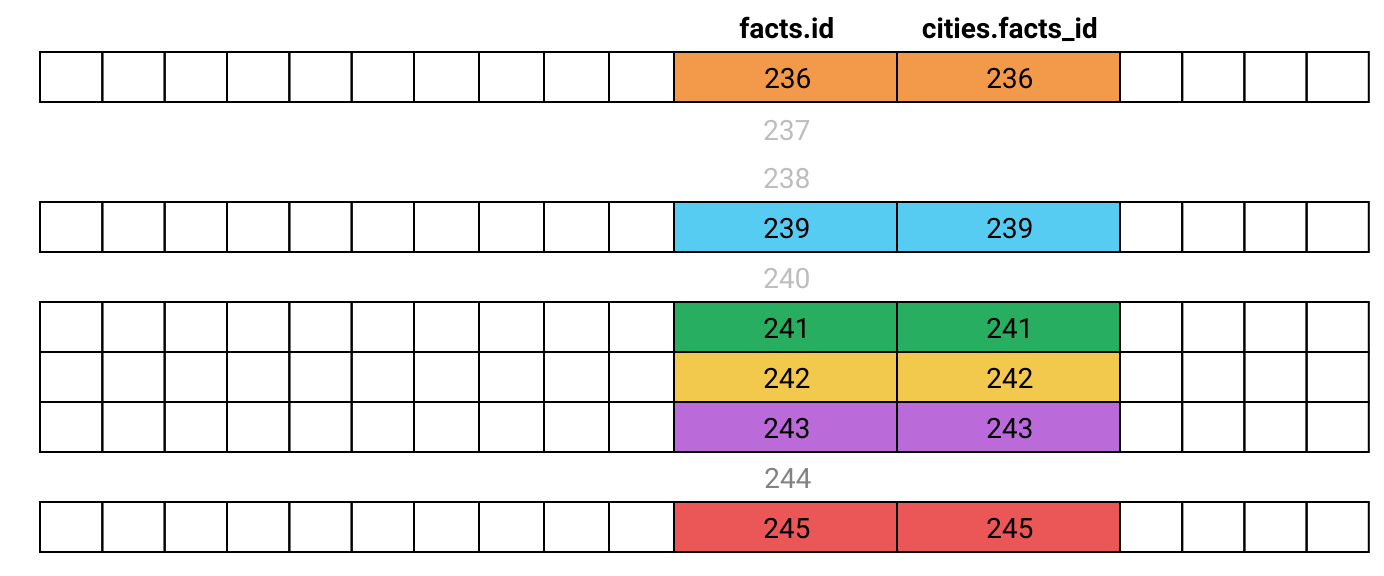

In [6]:
show_svg('/content/drive/MyDrive/my_datasets/svg/inner_join.svg')

Our inner join will include:

* Rows from the **cities** table that have a **cities.facts_id** that matches a **facts.id** from facts.
Our inner join will not include:

* Rows from the **cities** table that have a **cities.facts_id** that doesn't match any **facts.id** from **facts**.
* Rows from the **facts** table that have a **facts.id** that doesn't match any **cities.facts_id** from **cities**.

You can see this represented as a Venn diagram:

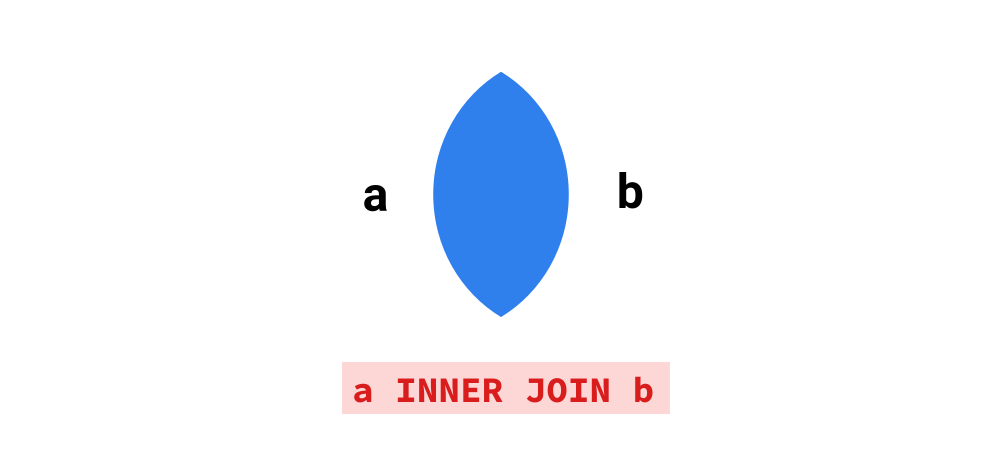

In [7]:
show_svg('/content/drive/MyDrive/my_datasets/svg/venn_inner.svg')

While our query from the previous screen included both columns from the **ON** clause, we don't need to use either column from our **ON** clause in our final list of columns. This is useful as it means we can show only the information we're interested in, rather than having to include the two join columns every time.

1. Write a query that:
* Joins **cities** to **facts** using an **INNER JOIN**.
* Uses aliases for table names.
* Includes, in order:
 * All columns from **cities**.
 * The **name** column from **facts** aliased to **country_name**.
* Includes only the first 5 rows.

In [8]:
df = pd.read_sql_query('''SELECT c.*, f.name country_name FROM facts f
                          INNER JOIN cities c ON c.facts_id = f.id
                          LIMIT 5;''', conn)
df

,id,name,population,capital,facts_id,country_name
0,1,Oranjestad,37000,1,216,Aruba
1,2,Saint John'S,27000,1,6,Antigua and Barbuda
2,3,Abu Dhabi,942000,1,184,United Arab Emirates
3,4,Dubai,1978000,0,184,United Arab Emirates
4,5,Sharjah,983000,0,184,United Arab Emirates


## Practicing Inner Joins

We'll need:
* The **name** column from **facts**
* The **name** column from **cities**

In [9]:
df = pd.read_sql_query('''SELECT f.name, c.name FROM cities c
                          INNER JOIN facts f ON f.id = c.facts_id
                          LIMIT 5;''', conn)
df

,name,name
0,Aruba,Oranjestad
1,Antigua and Barbuda,Saint John'S
2,United Arab Emirates,Abu Dhabi
3,United Arab Emirates,Dubai
4,United Arab Emirates,Sharjah


In [10]:
df = pd.read_sql_query('''SELECT c.* from cities c ;''', conn)
df

,id,name,population,capital,facts_id
0,1,Oranjestad,37000,1,216
1,2,Saint John'S,27000,1,6
2,3,Abu Dhabi,942000,1,184
3,4,Dubai,1978000,0,184
4,5,Sharjah,983000,0,184
...,...,...,...,...,...
392,393,Mbabane,66000,1,167
393,394,Sanaa,2419000,1,193
394,395,Aden,784000,0,193
395,396,Lusaka,1802000,1,194


The last part of our process is to make sure we have the correct rows. From the previous two screens we know that a query like this will return all rows from **cities** that have a corresponding match from **facts** in the **facts_id** column. We're only interested in the capital cities from the cities table, so we'll need to use a **WHERE** clause on the **capital** column, which has a value of **1** if the city is a capital, and **0** if it isn't:
```
WHERE c.capital = 1
```

In [11]:
df = pd.read_sql_query('''SELECT f.name country, c.name capital_city FROM facts f
                          INNER JOIN cities c ON c.facts_id = f.id
                          WHERE c.capital = 1;''', conn)
df

,country,capital_city
0,Aruba,Oranjestad
1,Antigua and Barbuda,Saint John'S
2,United Arab Emirates,Abu Dhabi
3,Afghanistan,Kabul
4,Algeria,Algiers
...,...,...
203,Samoa,Apia
204,Swaziland,Mbabane
205,Yemen,Sanaa
206,Zambia,Lusaka


## Left Join

As we mentioned earlier, an inner join will not include any rows where there is not a mutual match from both tables. This means there could be information we are not seeing in our query where rows don't match.

We can use some SQL queries to explore this:

In [12]:
df = pd.read_sql_query('''SELECT COUNT(DISTINCT(id))
                            FROM facts;''',conn)
df

,COUNT(DISTINCT(id))
0,261


In [13]:
df = pd.read_sql_query('''SELECT COUNT(DISTINCT(facts_id))
                            FROM cities;''',conn)
df

,COUNT(DISTINCT(facts_id))
0,210


By running these two queries, we can see that there are some countries in the **facts** table that don't have corresponding cities in the **cities** table, which indicates we may have some incomplete data.

Let's look at how we can create a query to explore the missing data using a new type of join— the **left join**.

A left join includes all the rows that an inner join will select, plus any rows from the first (or left) table that don't have a match in the second table. We can see this represented as a Venn diagram.

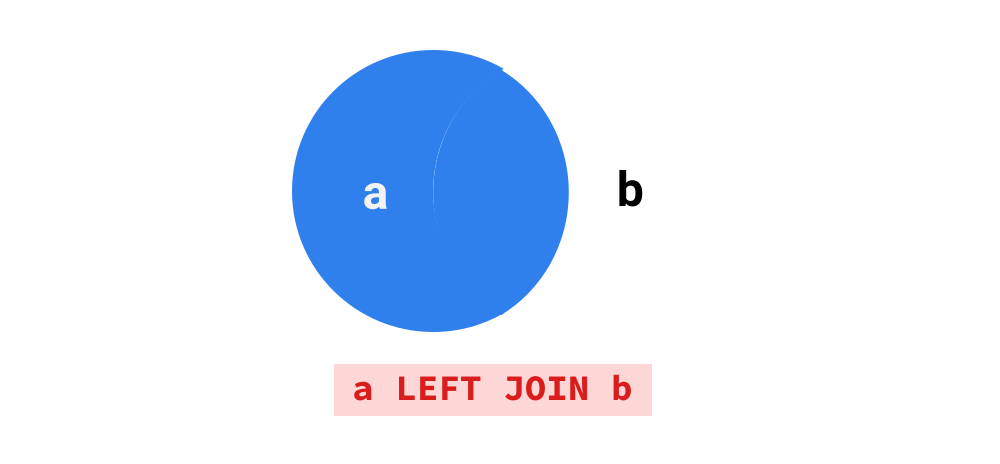

In [14]:
show_svg('/content/drive/MyDrive/my_datasets/svg/venn_left.svg')

Let's look at an example by replacing **INNER JOIN** with **LEFT JOIN** from the first query we wrote, and looking at the same selection of rows from our earlier diagram

``` 
SELECT * FROM facts
LEFT JOIN cities ON cities.facts_id = facts.id
```

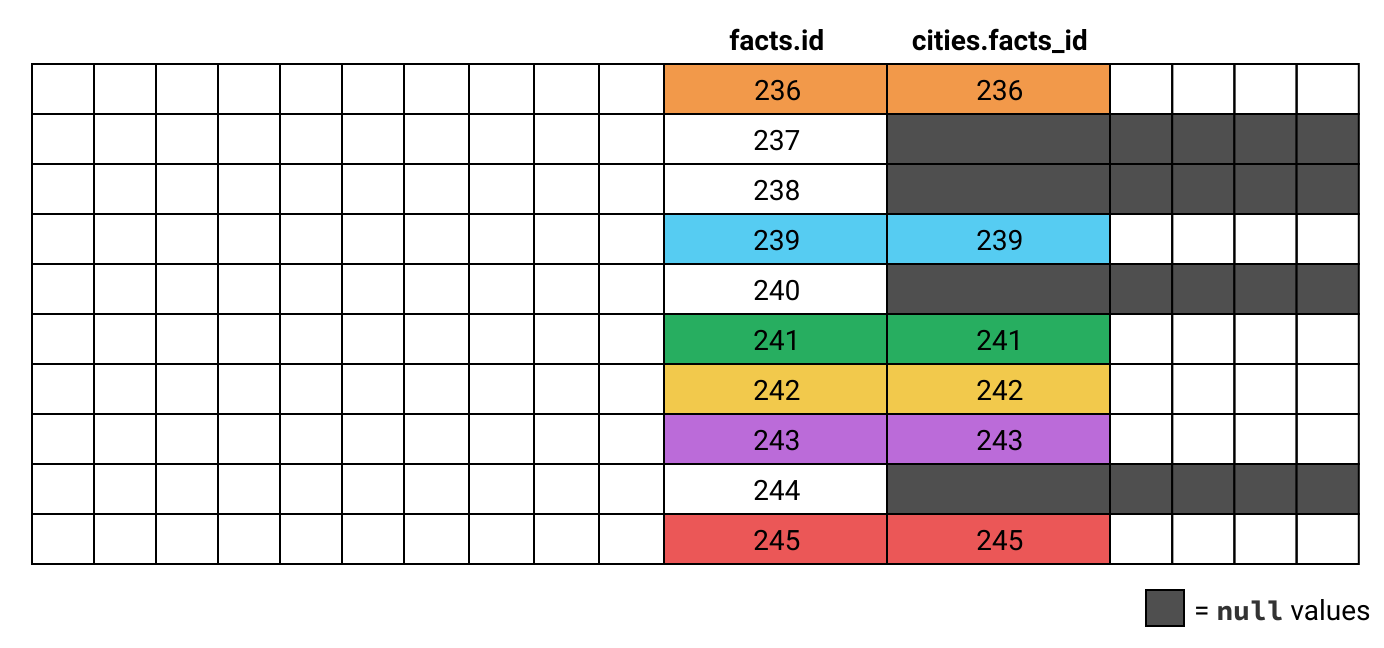

In [15]:
show_svg('/content/drive/MyDrive/my_datasets/svg/left_join.svg')

Here we can see that for the rows where **facts.id** doesn't match any values in **cities.facts_id** (237, 238, 240, and 244), the rows are still included in the results. When this happens, all of the columns from the cities table are populated with null values.

In [16]:
df = pd.read_sql_query('''SELECT * FROM facts
                          LEFT JOIN cities ON cities.facts_id = facts.id''',conn)
df

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,id,name,population,capital,facts_id
0,1,af,Afghanistan,652230.0,652230.0,0.0,3.256434e+07,2.32,38.57,13.89,1.51,6.0,Kabul,3097000.0,1.0,1
1,2,al,Albania,28748.0,27398.0,1350.0,3.029278e+06,0.30,12.92,6.58,3.30,10.0,Tirana,419000.0,1.0,2
2,3,ag,Algeria,2381741.0,2381741.0,0.0,3.954217e+07,1.84,23.67,4.31,0.92,7.0,Algiers,2916000.0,1.0,3
3,3,ag,Algeria,2381741.0,2381741.0,0.0,3.954217e+07,1.84,23.67,4.31,0.92,8.0,Oran,783000.0,0.0,3
4,4,an,Andorra,468.0,468.0,0.0,8.558000e+04,0.12,8.13,6.96,0.00,12.0,Andorra La Vella,23000.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,257,zh,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
444,258,xo,Indian Ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
445,259,zn,Pacific Ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
446,260,oo,Southern Ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


We can use these null values to filter our results to just the countries that don't exist in **cities** with a **WHERE** clause. When making a comparison to null in SQL, we use the **IS** keyword, rather than the = sign. If we want to select rows where a column is null we can write:
```
WHERE column_name IS NULL
```

If we want to select rows where a column name isn't null, we use:
```
WHERE column_name IS NOT NULL
```
Let's use a left join to explore the countries that don't exist in the **cities** table.

1. Write a query that returns the countries that don't exist in **cities**:
* Your query should return two columns:
 * The country names, with the alias **country**.
 * The country population.
* Use a **LEFT JOIN** to join **cities** to **facts**.
* Include only the countries from **facts** that don't have a corresponding value in **cities**.

In [17]:
df = pd.read_sql_query('''SELECT f.name country, f.population FROM facts f
                          LEFT JOIN cities c ON c.facts_id = f.id
                          WHERE c.name IS NULL;''',conn)
df

,country,population
0,Kosovo,1.870981e+06
1,Monaco,3.053500e+04
2,Nauru,9.540000e+03
3,San Marino,3.302000e+04
4,Singapore,5.674472e+06
5,Holy See (Vatican City),8.420000e+02
6,Taiwan,2.341513e+07
7,European Union,5.139494e+08
8,Ashmore and Cartier Islands,NaN
9,Christmas Island,1.530000e+03


## Right Joins and Outer Joins

Looking through the results of the query we wrote in the previous screen, we can see a number of different reasons that countries don't have corresponding values in **cities**:

* Countries with small populations and/or no major urban areas (which are defined as having populations of over 750,000), eg San Marino, Kosovo, and Nauru.
* City-states, such as Monaco and Singapore.
* Territories that are not themselves countries, such as Hong Kong, Gibraltar, and the Cook Islands.
* Regions & Oceans that aren't countries, such as the European Union and the Pacific Ocean.
* Genuine cases of missing data, such as Taiwan.

It's important whenever you use inner joins to be mindful that you might be excluding important data, especially if you are joining based on columns that aren't linked in the database schema.

There are two less-common join types SQLite does not support that you should be aware of. The first is a **right join**. A right join, as the name indicates, is exactly the opposite of a left join. While the left join includes all rows in the table before the **JOIN** clause, the right join includes all rows in the new table in the **JOIN** clause. We can see a right join in the Venn diagram below:

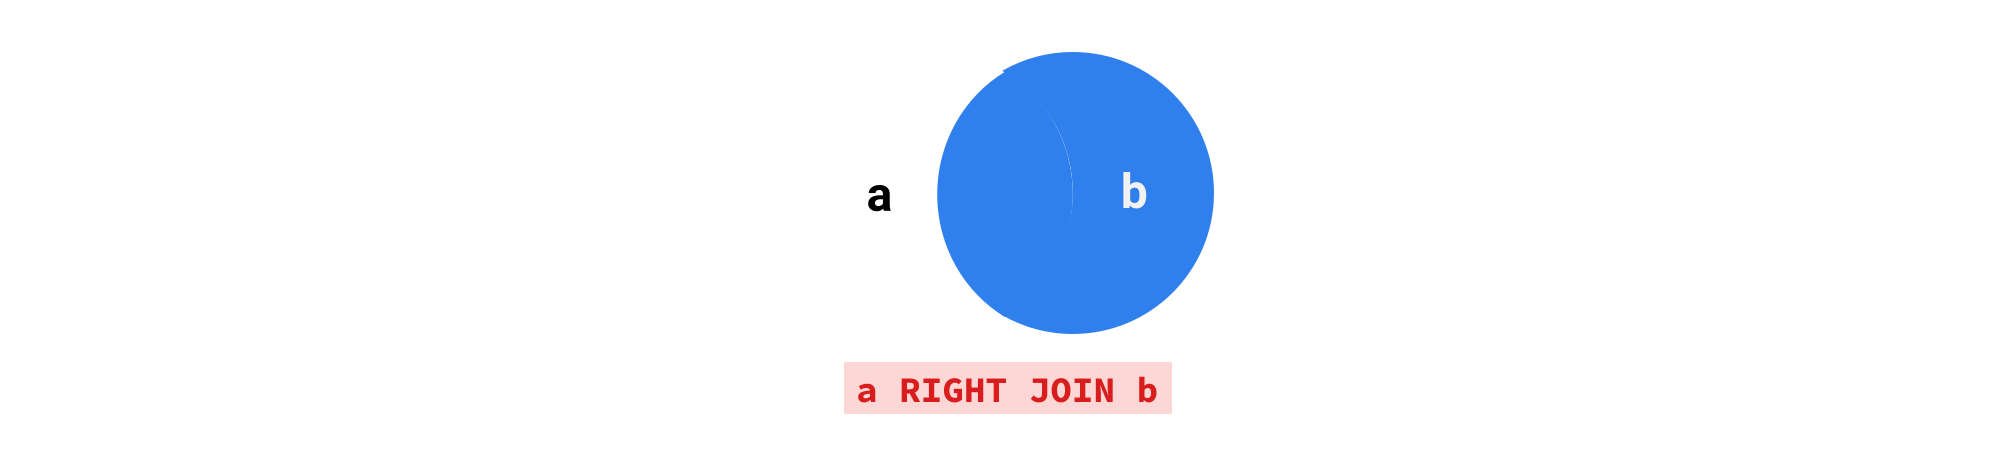

In [18]:
show_svg('/content/drive/MyDrive/my_datasets/svg/venn_right.svg')

The following two queries, one using a left join and one using a right join, produce identical results.
```
SELECT f.name country, c.name city
FROM facts f
LEFT JOIN cities c ON c.facts_id = f.id
LIMIT 5;
```
```
SELECT f.name country, c.name city
FROM cities c
RIGHT JOIN facts f ON f.id = c.facts_id
LIMIT 5;
```
The main reason a right join would be used is when you are joining more than two tables. In these cases, using a right join is preferable because it can avoid restructuring your whole query to join one table. Outside of this, right joins are used reasonably rarely, so for simple joins it's better to use a left join than a right as it will be easier for your query to be read and understood by others.

The other join type not supported by SQLite is a **full outer join**. A full outer join will include all rows from the tables on both sides of the join. We can see a full outer join in the Venn diagram below:

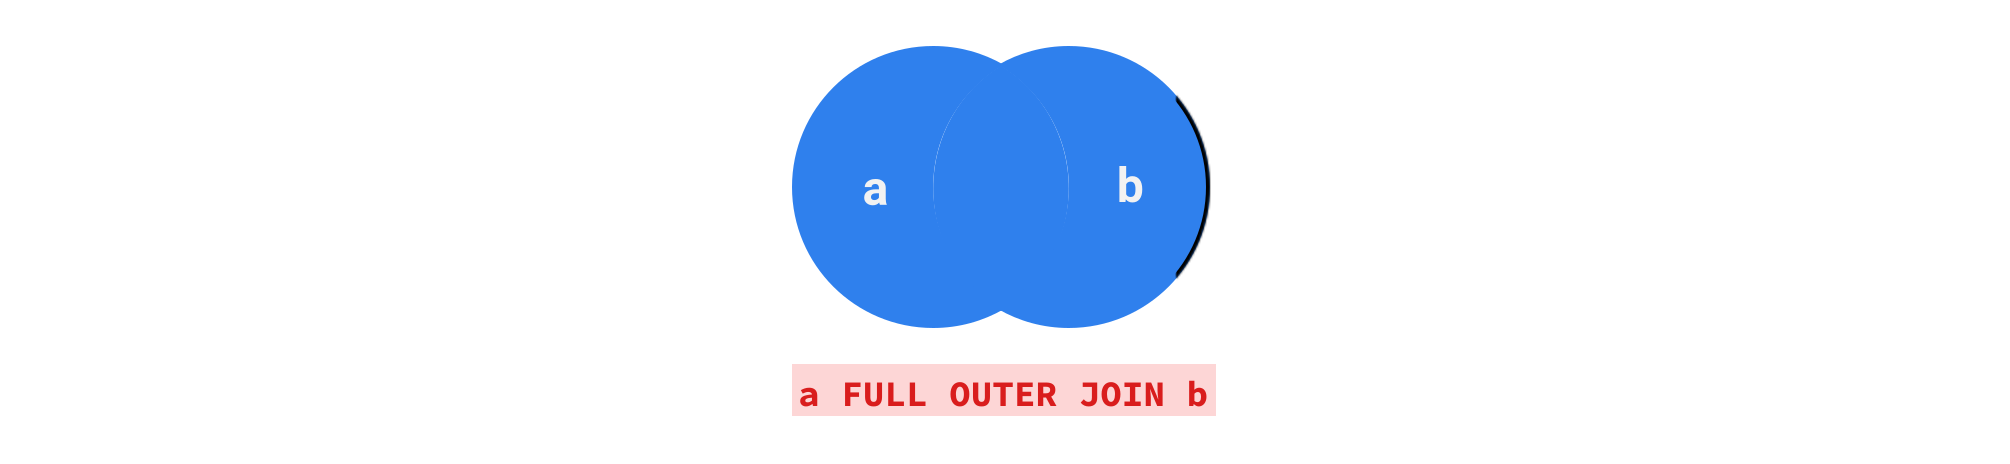

In [19]:
show_svg('/content/drive/MyDrive/my_datasets/svg/venn_full.svg')

```
SELECT f.name country, c.name city
FROM cities c
FULL OUTER JOIN facts f ON f.id = c.facts_id
LIMIT 5;
```
When joining **cities** and **facts** with a full outer join, the result will be the same as our left and right joins above, because there are no values in **cities.facts_id** that don't exist in **facts.id**.

Let's look at the Venn diagrams of each join type side by side, which should help you compare the differences of each of the four joins we've discussed so far.

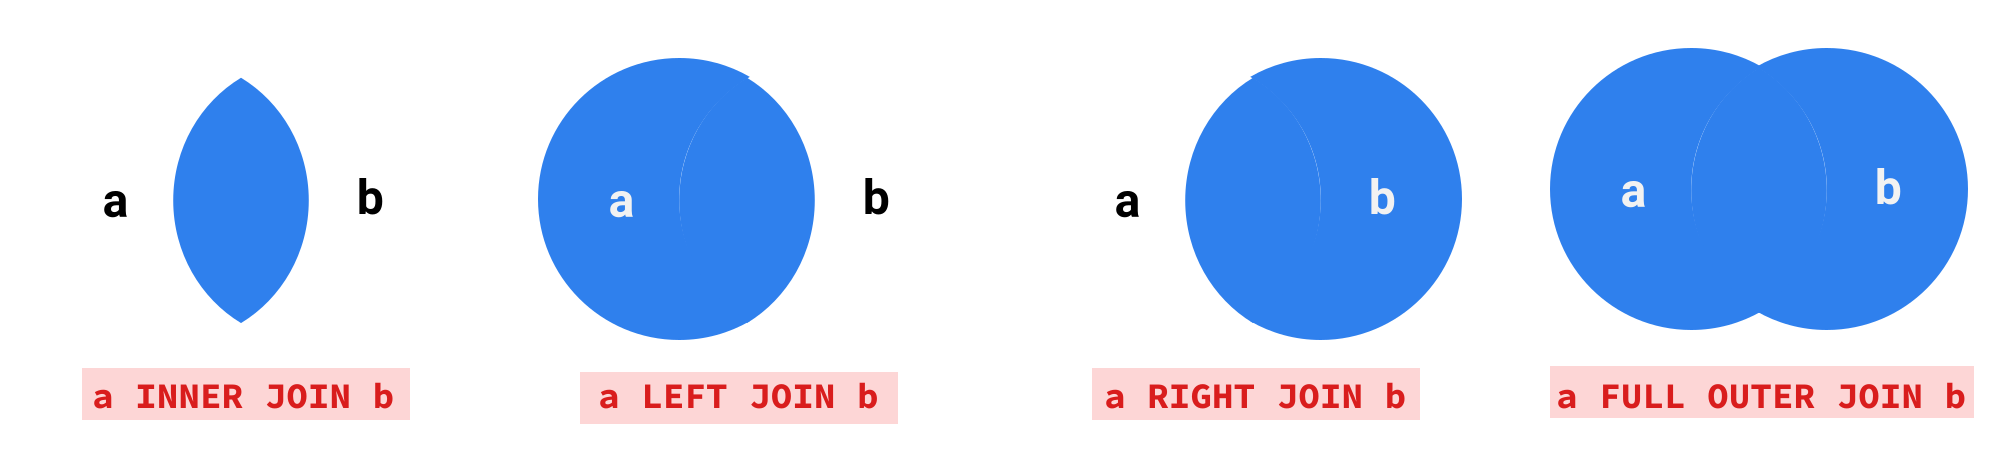

In [20]:
show_svg('/content/drive/MyDrive/my_datasets/svg/join_venn_diagram.svg')

## Finding the Most Populous Capital Cities

1. Write a query that returns the **10 capital** cities with the highest population ranked from biggest to smallest population.
You should include the following columns, in order:
* **capital_city**, the name of the city.
* **country**, the name of the country the city is from.
* **population**, the population of the city.

In [21]:
df = pd.read_sql_query('''SELECT c.name capital_city, f.name country, c.population FROM facts f
                          INNER JOIN cities c ON c.facts_id = f.id
                          WHERE c.capital = 1
                          ORDER BY 3 DESC
                          LIMIT 10;''', conn)
df

,capital_city,country,population
0,Tokyo,Japan,37217000
1,New Delhi,India,22654000
2,Mexico City,Mexico,20446000
3,Beijing,China,15594000
4,Dhaka,Bangladesh,15391000
5,Buenos Aires,Argentina,13528000
6,Manila,Philippines,11862000
7,Moscow,Russia,11621000
8,Cairo,Egypt,11169000
9,Jakarta,Indonesia,9769000


## Combining Joins with Subqueries

1. Using a join and a subquery, write a query that returns capital cities with populations of over **10 million** ordered from largest to smallest. Include the following columns:
* **capital_city** - the name of the city.
* **country** - the name of the country the city is the capital of.
* **population** - the population of the city.

In [22]:
df = pd.read_sql_query('''SELECT c.name capital_city, f.name country, c.population FROM facts f
                          INNER JOIN (SELECT * 
                                        FROM cities
                                       WHERE capital = 1 AND population > 10000000) c ON c.facts_id = f.id
                          ORDER BY 3 DESC;''', conn)
df

,capital_city,country,population
0,Tokyo,Japan,37217000
1,New Delhi,India,22654000
2,Mexico City,Mexico,20446000
3,Beijing,China,15594000
4,Dhaka,Bangladesh,15391000
5,Buenos Aires,Argentina,13528000
6,Manila,Philippines,11862000
7,Moscow,Russia,11621000
8,Cairo,Egypt,11169000


## Challenge: Complex Query with Joins and Subqueries

In [23]:
df = pd.read_sql_query('''SELECT *
                            FROM facts
                           LIMIT 5;''', conn)
df

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [24]:
df = pd.read_sql_query('''SELECT *
                            FROM cities
                           LIMIT 5;''', conn)
df

,id,name,population,capital,facts_id
0,1,Oranjestad,37000,1,216
1,2,Saint John'S,27000,1,6
2,3,Abu Dhabi,942000,1,184
3,4,Dubai,1978000,0,184
4,5,Sharjah,983000,0,184


| country                           | urban_pop | total_pop | urban_pct |
|:----------------------------------|-----------|-----------|-----------|
| Uruguay                           | 1672000   | 3341893   | 0.500315  |
| Congo, Republic of the            | 2445000   | 4755097   | 0.514185  |
| Brunei                            | 241000    | 429646    | 0.560927  |
| New Caledonia                     | 157000    | 271615    | 0.578024  |
| Virgin Islands                    | 60000     | 103574    | 0.579296  |
| Falkland Islands (Islas Malvinas) | 2000      | 3361      | 0.595061  |
| Djibouti                          | 496000    | 828324    | 0.598800  |
| Australia                         | 13789000  | 22751014  | 0.606083  |
| Iceland                           | 206000    | 331918    | 0.620635  |
| Israel                            | 5226000   | 8049314   | 0.649248  |
| United Arab Emirates              | 3903000   | 5779760   | 0.675288  |
| Puerto Rico                       | 2475000   | 3598357   | 0.687814  |
| Bahamas, The                      | 254000    | 324597    | 0.782509  |
| Kuwait                            | 2406000   | 2788534   | 0.862819  |
| Saint Pierre and Miquelon         | 5000      | 5657      | 0.883861  |
| Guam                              | 169000    | 161785    | 1.044596  |
| Northern Mariana Islands          | 56000     | 52344     | 1.069846  |
| American Samoa                    | 64000     | 54343     | 1.177705  |

1. Write a query that generates output as shown above. The query should include:
* The following columns, in order:
 * **country**, the name of the country.
 * **urban_pop**, the sum of the population in major urban areas belonging to that country.
 * **total_pop**, the total population of the country.
 * **urban_pct**, the percentage of the population within urban areas, calculated by dividing **urban_pop** by **total_pop**.
* Only countries that have an **urban_pct** greater than 0.5.
* Rows should be sorted by **urban_pct** in ascending order.

In [25]:
df = pd.read_sql_query('''SELECT sum(c.population) urban_pop, f.name country, c.name citi  FROM facts f 
                            INNER JOIN cities c ON c.facts_id = f.id
                           WHERE f.name = "Yemen"
                           GROUP BY f.name
                           ''', conn)
df

,urban_pop,country,citi
0,3203000,Yemen,Aden


In [26]:
df = pd.read_sql_query('''SELECT f.name country, c.name city, c.population  FROM facts f 
                            INNER JOIN cities c ON c.facts_id = f.id
                           WHERE f.name == "Yemen";''', conn)
df

,country,city,population
0,Yemen,Sanaa,2419000
1,Yemen,Aden,784000


In [27]:
# Solution 1
df = pd.read_sql_query('''SELECT f.name country, sum(c.population) urban_pop, f.population total_pop, CAST(sum(c.population) AS FLOAT)/f.population urban_pct FROM facts f 
                            INNER JOIN cities c ON c.facts_id = f.id
                           GROUP BY f.name
                           HAVING urban_pct > 0.5
                           ORDER BY urban_pct ASC;''', conn)
df

,country,urban_pop,total_pop,urban_pct
0,Uruguay,1672000,3341893,0.500315
1,"Congo, Republic of the",2445000,4755097,0.514185
2,Brunei,241000,429646,0.560927
3,New Caledonia,157000,271615,0.578024
4,Virgin Islands,60000,103574,0.579296
5,Falkland Islands (Islas Malvinas),2000,3361,0.595061
6,Djibouti,496000,828324,0.598800
7,Australia,13789000,22751014,0.606083
8,Iceland,206000,331918,0.620635
9,Israel,5226000,8049314,0.649248


In [28]:
# Solution 2
df = pd.read_sql_query('''SELECT
    f.name country,
    c.urban_pop,
    f.population total_pop,
    (c.urban_pop / CAST(f.population AS FLOAT)) urban_pct
FROM facts f
INNER JOIN (
            SELECT
                facts_id,
                SUM(population) urban_pop
            FROM cities
            GROUP BY 1
           ) c ON c.facts_id = f.id
WHERE urban_pct > .5
ORDER BY 4 ASC;''',conn)
df

,country,urban_pop,total_pop,urban_pct
0,Uruguay,1672000,3341893,0.500315
1,"Congo, Republic of the",2445000,4755097,0.514185
2,Brunei,241000,429646,0.560927
3,New Caledonia,157000,271615,0.578024
4,Virgin Islands,60000,103574,0.579296
5,Falkland Islands (Islas Malvinas),2000,3361,0.595061
6,Djibouti,496000,828324,0.598800
7,Australia,13789000,22751014,0.606083
8,Iceland,206000,331918,0.620635
9,Israel,5226000,8049314,0.649248


# Intermediate Joins in SQL

## Working With Larger Databases

n the previous mission we learned how to use joins to combine data from two tables within a database. In reality, most databases have more than 2 tables, so we'll need strategies to be able to write queries to combine data from 3 or more tables.

In this mission we'll learn some new techniques to work with the sort of databases that most businesses will use. We'll be working with a modified version of a database called [Chinook](https://github.com/lerocha/chinook-database). The Chinook database contains information about a fictional digital music shop - kind of like a mini-iTunes store.

The Chinook database contains information about the artists, songs, and albums from the music shop, as well as information on the shop's employees, customers, and the customers purchases. This information is contained in eleven tables. Like with our Factbook database, a schema diagram will help us understand the available columns and the structure of the data. Here's a schema diagram for the Chinook database:

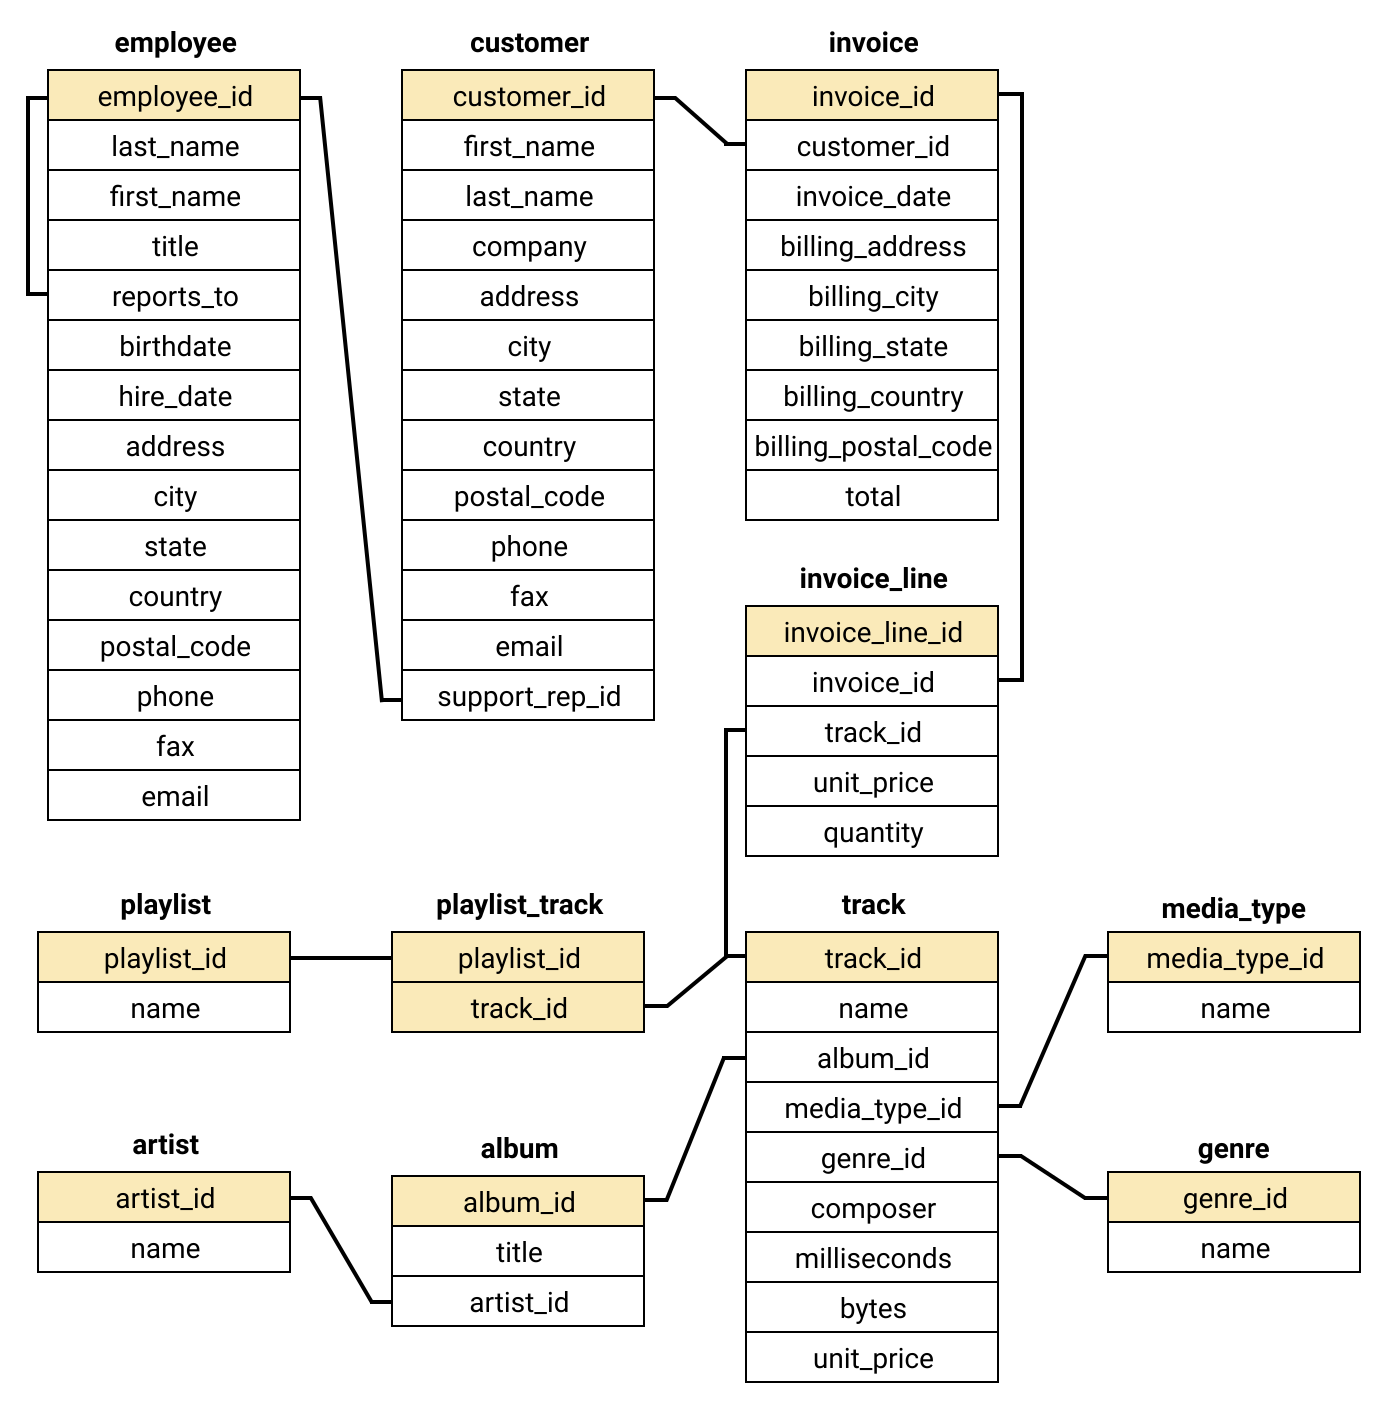

In [29]:
show_svg('/content/drive/MyDrive/my_datasets/svg/chinook-schema.svg')

Looking at all those tables can be overwhelming at first, but generally speaking we will only need to think about the specific tables that have the data we require and their connections. Before we look at some specific tables, let's take a moment to understand the different parts of the schema diagram.

* Tables names are shown in bold, with the columns in each table listed below.
* Each table has one or more columns with shading, which indicates those columns are a primary key. We'll learn more about primary keys in a later mission, but for now all you need to know is that each row's **primary key** must be unique.
* Relationships between tables are shown using lines between the tables. The lines indicate which columns are related. You may notice that at least one 'end' of the relationship will be a primary key.
As you work through this mission, you may need to refer back to the schema diagram. This is normal, so don't be bothered when that happens. It can also be helpful to write a simple query to check the column names and some example data from any of the tables, for instance:

In [30]:
con = sqlite3.connect('/content/drive/MyDrive/my_datasets/Intermediate SQL for Data Analysis/chinook.db')
print('Connected database')

Connected database


In [31]:
df = pd.read_sql_query('''SELECT * 
                            FROM album
                           LIMIT 3;''', con)
df

,album_id,title,artist_id
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2


## Joining Three Tables

Our first task is to gather some information on a specific purchase. For one single purchase (**invoice_id**) we want to know, for each track purchased:

* The id of the track.
* The name of the track.
* The name of media type of the track.
* The price that the customer paid for the track.
* The quantity of the track that was purchased.
To gather this information, we will need to write a query that joins 3 tables: **invoice_line**, **track**, and **media_type**. To make this easier, a schema diagram of just these three tables is below:

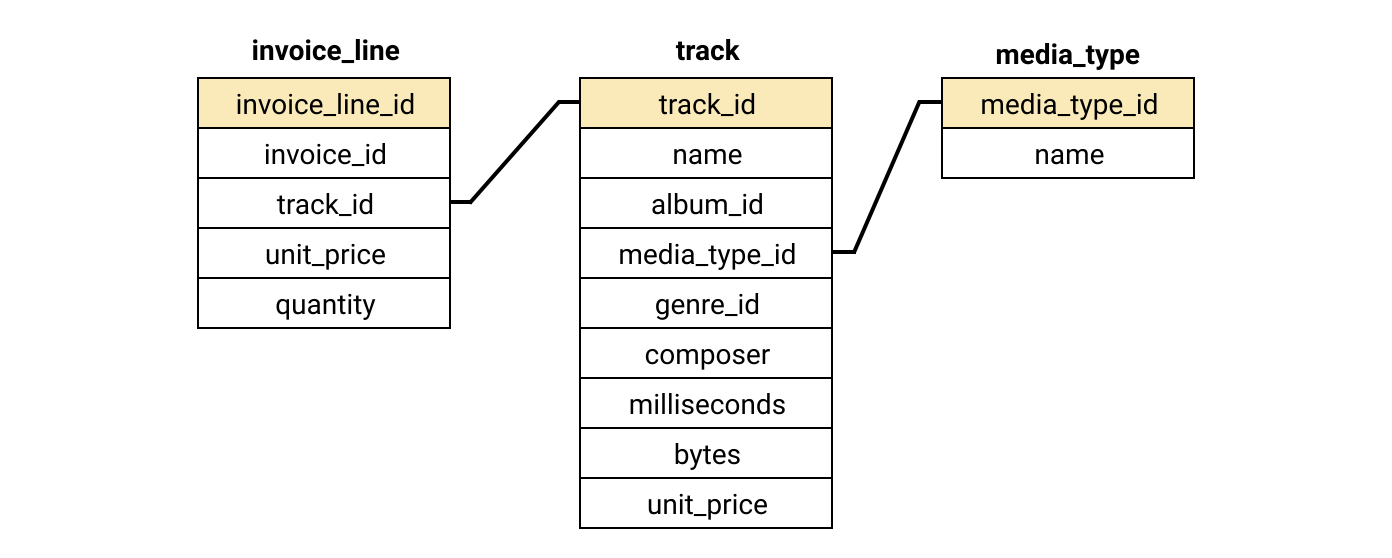

In [32]:
show_svg('/content/drive/MyDrive/my_datasets/svg/schema_il_t_mt.svg')

If you didn't explore these 3 tables in the previous screen, take a moment now to explore them:

* For each of invoice_line, track, and media_type:
 * Write a simple query to view the first few rows of each of these tables.
 * Look at the result of the query to become familiar with the columns and what sort of data we are working with.

Now that you're familiar with the data, we can look at the syntax for joining data from more than 2 tables.
```
SELECT [column_names] FROM [table_name_one]
[join_type] JOIN [table_name_two] ON [join_constraint]
[join_type] JOIN [table_name_three] ON [join_constraint];
```

We will use the **invoice_line** table in our **FROM** clause, since it contains 3 of the 5 columns we want in our final query. You don't have to follow this pattern but if you're not sure, it's a good place to start. Since our task involves looking for information about a specific **invoice_id**, let's choose an **invoice_id** value of 3. Selecting all lines from **invoice_line** with an invoice_id is straightforward:

In [33]:
df = pd.read_sql_query('''SELECT *
                            FROM invoice_line
                           WHERE invoice_id = 3;''', con)
df

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,27,3,2516,0.99,1
1,28,3,2646,0.99,1


Now we can use an inner join to add the data from the **track** table.

In [34]:
df = pd.read_sql_query('''SELECT * FROM invoice_line il
                           INNER JOIN track t ON t.track_id = il.track_id
                           WHERE invoice_id =3;''', con)
df

,invoice_line_id,invoice_id,track_id,unit_price,quantity,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,27,3,2516,0.99,1,2516,Black Hole Sun,203,1,1,Soundgarden,320365,10425229,0.99
1,28,3,2646,0.99,1,2646,I Looked At You,214,1,1,"Robby Krieger, Ray Manzarek, John Densmore, Ji...",142080,4663988,0.99


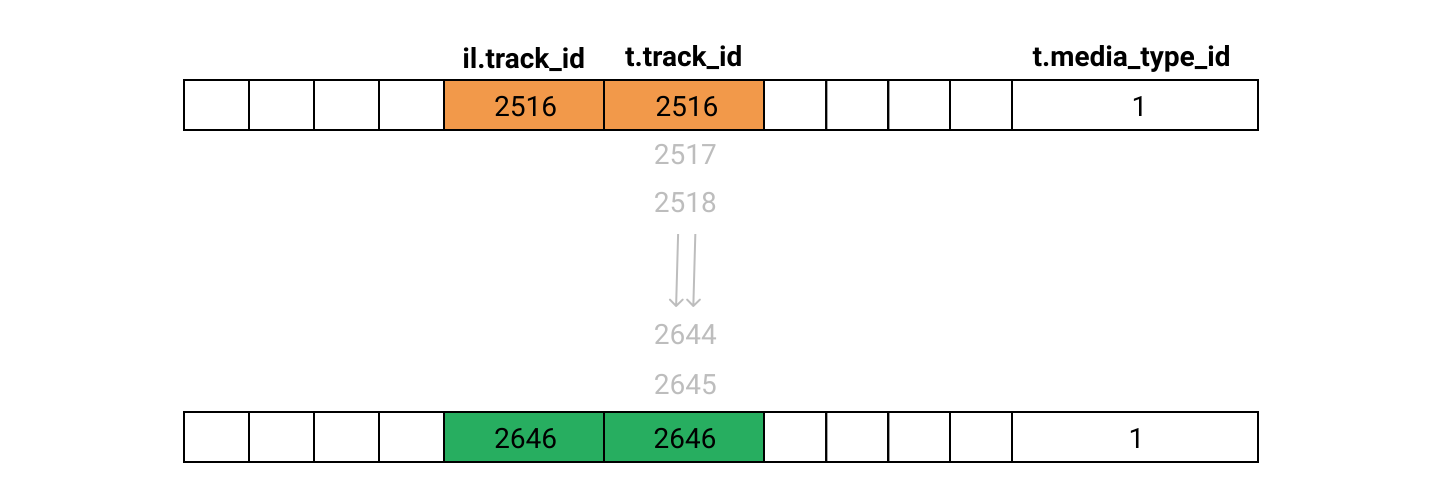

In [35]:
show_svg('/content/drive/MyDrive/my_datasets/svg/multiple_joins_step1.svg')

Next, we add our second join to add the data from the **media_type** table.

In [36]:
df = pd.read_sql_query('''SELECT * FROM invoice_line il
                           INNER JOIN track t ON t.track_id = il.track_id
                           INNER JOIN media_type mt ON t.media_type_id = mt.media_type_id
                           WHERE invoice_id = 3;''', con)
df

,invoice_line_id,invoice_id,track_id,unit_price,quantity,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price,media_type_id,name
0,27,3,2516,0.99,1,2516,Black Hole Sun,203,1,1,Soundgarden,320365,10425229,0.99,1,MPEG audio file
1,28,3,2646,0.99,1,2646,I Looked At You,214,1,1,"Robby Krieger, Ray Manzarek, John Densmore, Ji...",142080,4663988,0.99,1,MPEG audio file


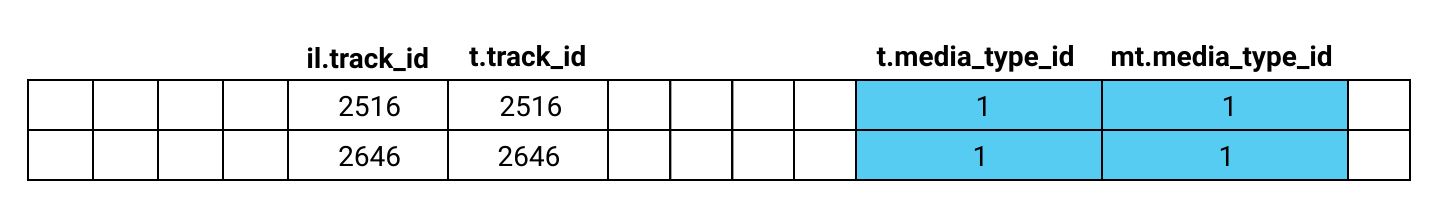

In [37]:
show_svg('/content/drive/MyDrive/my_datasets/svg/multiple_joins_step2.svg')

The last step is to alter the **SELECT** clause to include only the columns we require - let's do that now with a different order.

1. Write a query that gathers data about the invoice with an invoice_id of 4. Include the following columns in order:
* The id of the track, **track_id**.
* The name of the track, **track_name**.
* The name of media type of the track, **track_type**.
* The price that the customer paid for the track, **unit_price**.
* The quantity of the track that was purchased, **quantity**.

In [38]:
df = pd.read_sql_query('''SELECT il.track_id, 
                                 t.name track_name, 
                                 mt.name track_type, 
                                 il.unit_price, 
                                 il.quantity 
                           FROM invoice_line il
                           INNER JOIN track t ON t.track_id = il.track_id
                           INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
                           WHERE il.invoice_id = 4;''', con)
df

,track_id,track_name,track_type,unit_price,quantity
0,3448,"Lamentations of Jeremiah, First Set \ Incipit ...",Protected AAC audio file,0.99,1
1,2560,Violent Pornography,MPEG audio file,0.99,1
2,3336,War Pigs,Purchased AAC audio file,0.99,1
3,829,Let's Get Rocked,MPEG audio file,0.99,1
4,1872,Attitude,MPEG audio file,0.99,1
5,748,Dealer,MPEG audio file,0.99,1
6,1778,You're What's Happening (In The World Today),MPEG audio file,0.99,1
7,2514,Spoonman,MPEG audio file,0.99,1


## Joining More Than Three Tables

Let's extend the query we wrote in the previous screen by adding the artist for each track. If you examine the schema, you'll notice that the data for the artist's name is not directly connected to the **track** table.

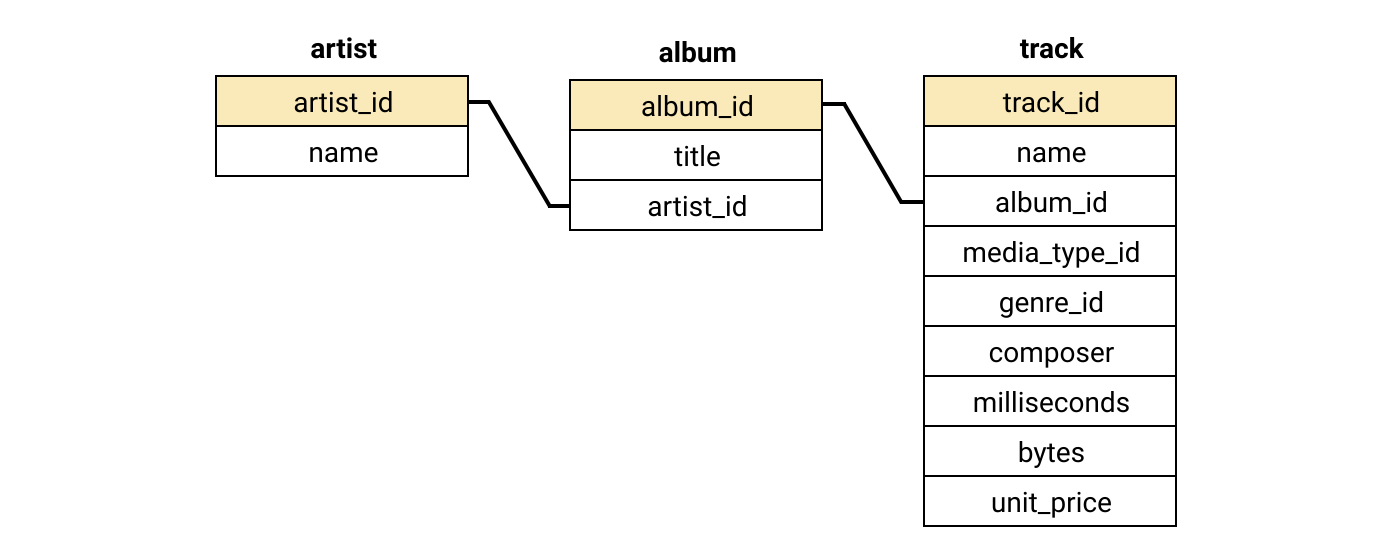

In [39]:
show_svg('/content/drive/MyDrive/my_datasets/svg/schema_t_al_ar.svg')

In this case, we will need to join two new tables to our existing query:

* **artist**, which contains the artist name data that we need
* **album**, which has a column common to each of the artist and track tables which allows us to join those two tables.

Our select clause won't actually use any of the columns from the **album** table. This is quite common when writing more complex queries because it will let you join to another table.

The query from the previous screen is included here:
```
SELECT
    il.track_id,
    t.name track_name,
    mt.name track_type,
    il.unit_price,
    il.quantity
FROM invoice_line il
INNER JOIN track t ON t.track_id = il.track_id
INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
WHERE il.invoice_id = 4;
```

Add a column containing the artists name to the query from the previous screen.
* The column should be called **artist_name**
* The column should be placed between **track_name** and **track_type**

In [40]:
df = pd.read_sql_query('''SELECT il.track_id, 
                                 t.name track_name,
                                 ar.name artist_name, 
                                 mt.name track_type, 
                                 il.unit_price, 
                                 il.quantity 
                           FROM invoice_line il
                           INNER JOIN track t ON t.track_id = il.track_id
                           INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
                           INNER JOIN album al ON al.album_id = t.album_id
                           INNER JOIN artist ar ON ar.artist_id = al.artist_id
                           WHERE il.invoice_id = 4;''', con)
df

,track_id,track_name,artist_name,track_type,unit_price,quantity
0,3448,"Lamentations of Jeremiah, First Set \ Incipit ...",The King's Singers,Protected AAC audio file,0.99,1
1,2560,Violent Pornography,System Of A Down,MPEG audio file,0.99,1
2,3336,War Pigs,Cake,Purchased AAC audio file,0.99,1
3,829,Let's Get Rocked,Def Leppard,MPEG audio file,0.99,1
4,1872,Attitude,Metallica,MPEG audio file,0.99,1
5,748,Dealer,Deep Purple,MPEG audio file,0.99,1
6,1778,You're What's Happening (In The World Today),Marvin Gaye,MPEG audio file,0.99,1
7,2514,Spoonman,Soundgarden,MPEG audio file,0.99,1


## Combining Multiple Joins with Subqueries

Because the **invoice_line** table contains each individual song from each customer purchase, it contains information about which songs are purchased the most. We can use the table to find out which artists are purchased the most. Specifically, what we want to produce is a query that lists *the top 10 artists, calculated by the number of times a track by that artist has been purchased*.

We'll need to use a **GROUP BY** clause to get the number of tracks purchased from each artist, but before we do we'll have to join a few tables. As we start thinking about how we will write this query, we can look at the database schema from the first screen of this mission and think about what tables we will need to include.

Writing our query would be a lot easier if we had one table that contained both the **track.track_id** and the **artist.name** columns. We can write a subquery that creates this table for us, and then use that subquery to calculate our answer. This means our process will be:

* Write a subquery that produces a table with **track.track_id** and **artist.name**,
* Join that subquery to the **invoice_line** table,
* Use a **GROUP BY** statement to calculate the number of times each artist has had a track purchased, and find the top 10.

We can write our subquery by joining **album** to **track** and then **artist** to album, just like we did in the previous screen. We'll add an **ORDER BY** and **LIMIT** to our query so we're only looking at manageable sample of the data, but we'll remove it when we move to the next step.

In [41]:
df = pd.read_sql_query('''
SELECT
    t.track_id,
    ar.name artist_name
FROM track t
INNER JOIN album al ON al.album_id = t.album_id
INNER JOIN artist ar ON ar.artist_id = al.artist_id
ORDER BY 1 LIMIT 5;''',con)
df

,track_id,artist_name
0,1,AC/DC
1,2,Accept
2,3,Accept
3,4,Accept
4,5,Accept


Next, we need to join this subquery to our **invoice_line** table. We'll give our subquery an alias ta for 'track artist' to make it easier to refer to. Again, we'll add an **ORDER BY** and **LIMIT** statement to this step so our output is more manageable.

In [42]:
df = pd.read_sql_query('''
SELECT
    il.invoice_line_id,
    il.track_id,
    ta.artist_name
FROM invoice_line il
INNER JOIN (
            SELECT
                t.track_id,
                ar.name artist_name
            FROM track t
            INNER JOIN album al ON al.album_id = t.album_id
            INNER JOIN artist ar ON ar.artist_id = al.artist_id
           ) ta
           ON ta.track_id = il.track_id
ORDER BY 1 
LIMIT 5;
''',con)
df

,invoice_line_id,track_id,artist_name
0,1,1158,Guns N' Roses
1,2,1159,Guns N' Roses
2,3,1160,Guns N' Roses
3,4,1161,Guns N' Roses
4,5,1162,Guns N' Roses


At first it might look like we've done something wrong, because the artist for all rows is Guns N' Roses, but that's because the very first order in our table is a customer who purchased an entire Guns N' Roses album! All that remains now is for us to add our **GROUP BY** clause, remove the extra columns and use **ORDER BY** and **LIMIT** clauses to select the 10 most popular artists.

In [43]:
df = pd.read_sql_query('''
SELECT
    ta.artist_name artist,
    COUNT(*) tracks_purchased
FROM invoice_line il
INNER JOIN (
            SELECT
                t.track_id,
                ar.name artist_name
            FROM track t
            INNER JOIN album al ON al.album_id = t.album_id
            INNER JOIN artist ar ON ar.artist_id = al.artist_id
           ) ta
           ON ta.track_id = il.track_id
GROUP BY 1
ORDER BY 2 DESC 
LIMIT 10;
''',con)

df

,artist,tracks_purchased
0,Queen,192
1,Jimi Hendrix,187
2,Nirvana,130
3,Red Hot Chili Peppers,130
4,Pearl Jam,129
5,AC/DC,124
6,Guns N' Roses,124
7,Foo Fighters,121
8,The Rolling Stones,117
9,Metallica,106


1. Write a query that returns the top 5 albums, as calculated by the number of times a track from that album has been purchased. Your query should be sorted from most tracks purchased to least tracks purchased and return the following columns, in order:
* **album**, the title of the album
* **artist**, the artist who produced the album
* **tracks_purchased** the total number of tracks purchased from that album

In [44]:
df = pd.read_sql_query('''
SELECT 
    ta.album,
    ta.artist,
    SUM(il.quantity) tracks_purchased
FROM invoice_line il
INNER JOIN (SELECT 
                t.track_id,
                al.title album,
                ar.name artist
            FROM track t
            INNER JOIN album al ON al.album_id = t.album_id
            INNER JOIN artist ar ON ar.artist_id = al.artist_id
            ) ta 
            ON ta.track_id = il.track_id
GROUP BY 1
ORDER BY 3 DESC
LIMIT 5;''', con)

df

,album,artist,tracks_purchased
0,Are You Experienced?,Jimi Hendrix,187
1,Faceless,Godsmack,96
2,Mezmerize,System Of A Down,93
3,Get Born,JET,90
4,The Doors,The Doors,83


## Recursive Joins

In some cases, there can be a relation between two columns within the same table. We can see that in our **employee** table, where there is a **reports_to** column that has a relation to the **employee_id** column within the same table.

The **reports_to** column identifies each employee's supervisor. If we wanted to create a report of each employee and their supervisor's name, we would need some way of joining a table to itself. Doing this is called a **recursive join**.

Technically, a recursive join will use one of the other standard joins— usually an **INNER JOIN** or **LEFT JOIN** since these are the most commonly used joins— and aliases to distinguish between the table on each side of the join. Here's a simple example of a recursive join in action:

In [45]:
df = pd.read_sql_query('''
SELECT
    e1.employee_id,
    e2.employee_id supervisor_id
FROM employee e1
INNER JOIN employee e2 on e1.reports_to = e2.employee_id
LIMIT 4;
''',con)
df

,employee_id,supervisor_id
0,2,1
1,6,1
2,3,2
3,4,2


To make our report more meaningful, we'll need to add some extra columns. One thing that would be nice is being able to combine the **first_name** and **last_name** columns into a single column. We can do that using the **concatenate operator**: ||.

You can explore how the concatenate operator works by writing a simple query:
```
SELECT ("this" || "is" || "my" || "string");
```
```
thisismystring
```

1. Write a query that returns information about each employee and their supervisor.
* The report should include employees even if they do not report to another employee.
* The report should be sorted alphabetically by the employee_name column.
* Your query should return the following columns, in order:
 * **employee_name** - containing the first_name and last_name columns separated by a space, eg Luke Skywalker
 * **employee_title** - the title of that employee
 * **supervisor_name** - the first and last name of the person the employee reports to, in the same format as employee_name
 * **supervisor_title** - the title of the person the employee reports to

In [46]:
df = pd.read_sql_query('''
SELECT 
    e1.first_name || " " || e1.last_name employee_name,
    e1.title employee_title,
    e2.first_name || " " || e2.last_name supervisor_name,
    e2.title supervisor_title
FROM employee e1
LEFT JOIN employee e2 ON e1.reports_to = e2.employee_id   
ORDER BY 1;
''',con)
df

,employee_name,employee_title,supervisor_name,supervisor_title
0,Andrew Adams,General Manager,None,None
1,Jane Peacock,Sales Support Agent,Nancy Edwards,Sales Manager
2,Laura Callahan,IT Staff,Michael Mitchell,IT Manager
3,Margaret Park,Sales Support Agent,Nancy Edwards,Sales Manager
4,Michael Mitchell,IT Manager,Andrew Adams,General Manager
5,Nancy Edwards,Sales Manager,Andrew Adams,General Manager
6,Robert King,IT Staff,Michael Mitchell,IT Manager
7,Steve Johnson,Sales Support Agent,Nancy Edwards,Sales Manager


## Pattern Matching Using Like

Let's say you're working as a sales support agent for Chinook, and you get back from lunch and see that one of your colleagues has left a phone message on your desk: "Call Jen". Writing a query to get this information out of the database might seem simple at first:

In [47]:
df = pd.read_sql_query('''
SELECT 
    first_name,
    last_name,
    phone
FROM customer
WHERE first_name = "Jen"''',con)
df

,first_name,last_name,phone


No rows were returned by your query! Suddenly you realize— the name in the database might not be exactly "Jen", it might be Jenny, Jennifer, Jenna, or something else. Rather than having to keep trying different combinations, we can use the **LIKE** operator to find pattern matches. The syntax for **LIKE** is as follows:
```
WHERE [column_name] LIKE "[pattern]"
```

Your pattern should be the substring you want to match for, and one or more % characters:

* **%Jen** - will match Jen at the end of a string, eg Sarah-Jen
* **Jen%** - will match Jen at the start of a string, eg Jenny
* **%Jen%** - will match Jen anywhere within the string, eg Kris Jenner
We'll use the last pattern to give ourselves the best chance of a match:

In [48]:
df = pd.read_sql_query('''
SELECT 
    first_name,
    last_name,
    phone
FROM customer
WHERE first_name LIKE "%Jen%"''',con)
df

,first_name,last_name,phone
0,Jennifer,Peterson,+1 (604) 688-2255


Perfect - we have found one match and have Jennifer's number so we can return her call.

Keep in mind that in SQLite **LIKE** is case insensitive, so **LIKE "%jen%"** will match **Jen** and **JEN** and **JeN**. Other flavors of SQL may be case sensitive, so you may need to [use the **LOWER()** function to get a case insensitive match](https://stackoverflow.com/questions/18853452/sql-select-like-insensitive-casing).

You have just returned from lunch to see another phone message on your desk: "Call Belle."

1. Write a query that finds the contact details of a customer with a **first_name** containing **Belle** from the database. Your query should include the following columns, in order:
* **first_name**
* **last_name**
* **phone**

In [49]:
df = pd.read_sql_query('''
SELECT
    first_name,
    last_name,
    phone
FROM customer
WHERE LOWER(first_name) LIKE LOWER("%belle%");
''',con)
df

,first_name,last_name,phone
0,Isabelle,Mercier,+33 03 80 73 66 99


## Revisiting CASE

As we previously learned we can do this with the **case statement**. The case statement acts like a series of if/then options for a new column. The syntax for **CASE** is:
```
CASE
    WHEN [comparison_1] THEN [value_1]
    WHEN [comparison_2] THEN [value_2]
    ELSE [value_3]
    END
    AS [new_column_name]
```

Write a query that summarizes the purchases of each customer. For the purposes of this exercise, we **do not have any two customers with the same name**.
Your query should include the following columns, in order:
* **customer_name** - containing the * first_name and last_name columns separated by a space, eg Luke Skywalker.
* **number_of_purchases**, counting the number of purchases made by each customer.
* **total_spent** - the total sum of money spent by each customer.
* **customer_category** - a column that categorizes the customer based on their total purchases. The column should contain the following values:
 * **small spender** - If the customer's total purchases are less than \$40.
 * **big spender** - If the customer's total purchases are greater than \$100.
 * **regular** - If the customer's total purchases are between \$40 and $100 (inclusive).
* Order your results by the **customer_name** column.

In [50]:
df = pd.read_sql_query('''
SELECT
   c.first_name || " " || c.last_name customer_name,
   COUNT(i.invoice_id) number_of_purchases,
   SUM(i.total) total_spent,
   CASE
       WHEN sum(i.total) < 40 THEN 'small spender'
       WHEN sum(i.total) > 100 THEN 'big spender'
       ELSE 'regular'
       END
       AS customer_category
FROM invoice i
INNER JOIN customer c ON i.customer_id = c.customer_id
GROUP BY 1 ORDER BY 1;
''', con)
df

,customer_name,number_of_purchases,total_spent,customer_category
0,Aaron Mitchell,8,70.29,regular
1,Alexandre Rocha,10,69.30,regular
2,Astrid Gruber,9,69.30,regular
3,Bjørn Hansen,9,72.27,regular
4,Camille Bernard,9,79.20,regular
5,Daan Peeters,7,60.39,regular
6,Dan Miller,12,95.04,regular
7,Diego Gutiérrez,5,39.60,small spender
8,Dominique Lefebvre,9,72.27,regular
9,Eduardo Martins,12,60.39,regular


# Building and Organizing Complex Queries

## Introduction

In the previous two missions, we've learned a lot about joining data. We've gone from creating basic joins between two tables to making complex joins using multiple tables, subqueries, unusual join types and aggregate functions.

In this mission, we're going to continue to practice constructing complex joins, while also learning how to:

* Build and format your queries for readability
* Creating named subqueries and views
* Combining data using set operations.

Just like the previous mission, we'll be working with the Chinook database. So you can easily refer to it, the schema for the Chinook database is provided again below.

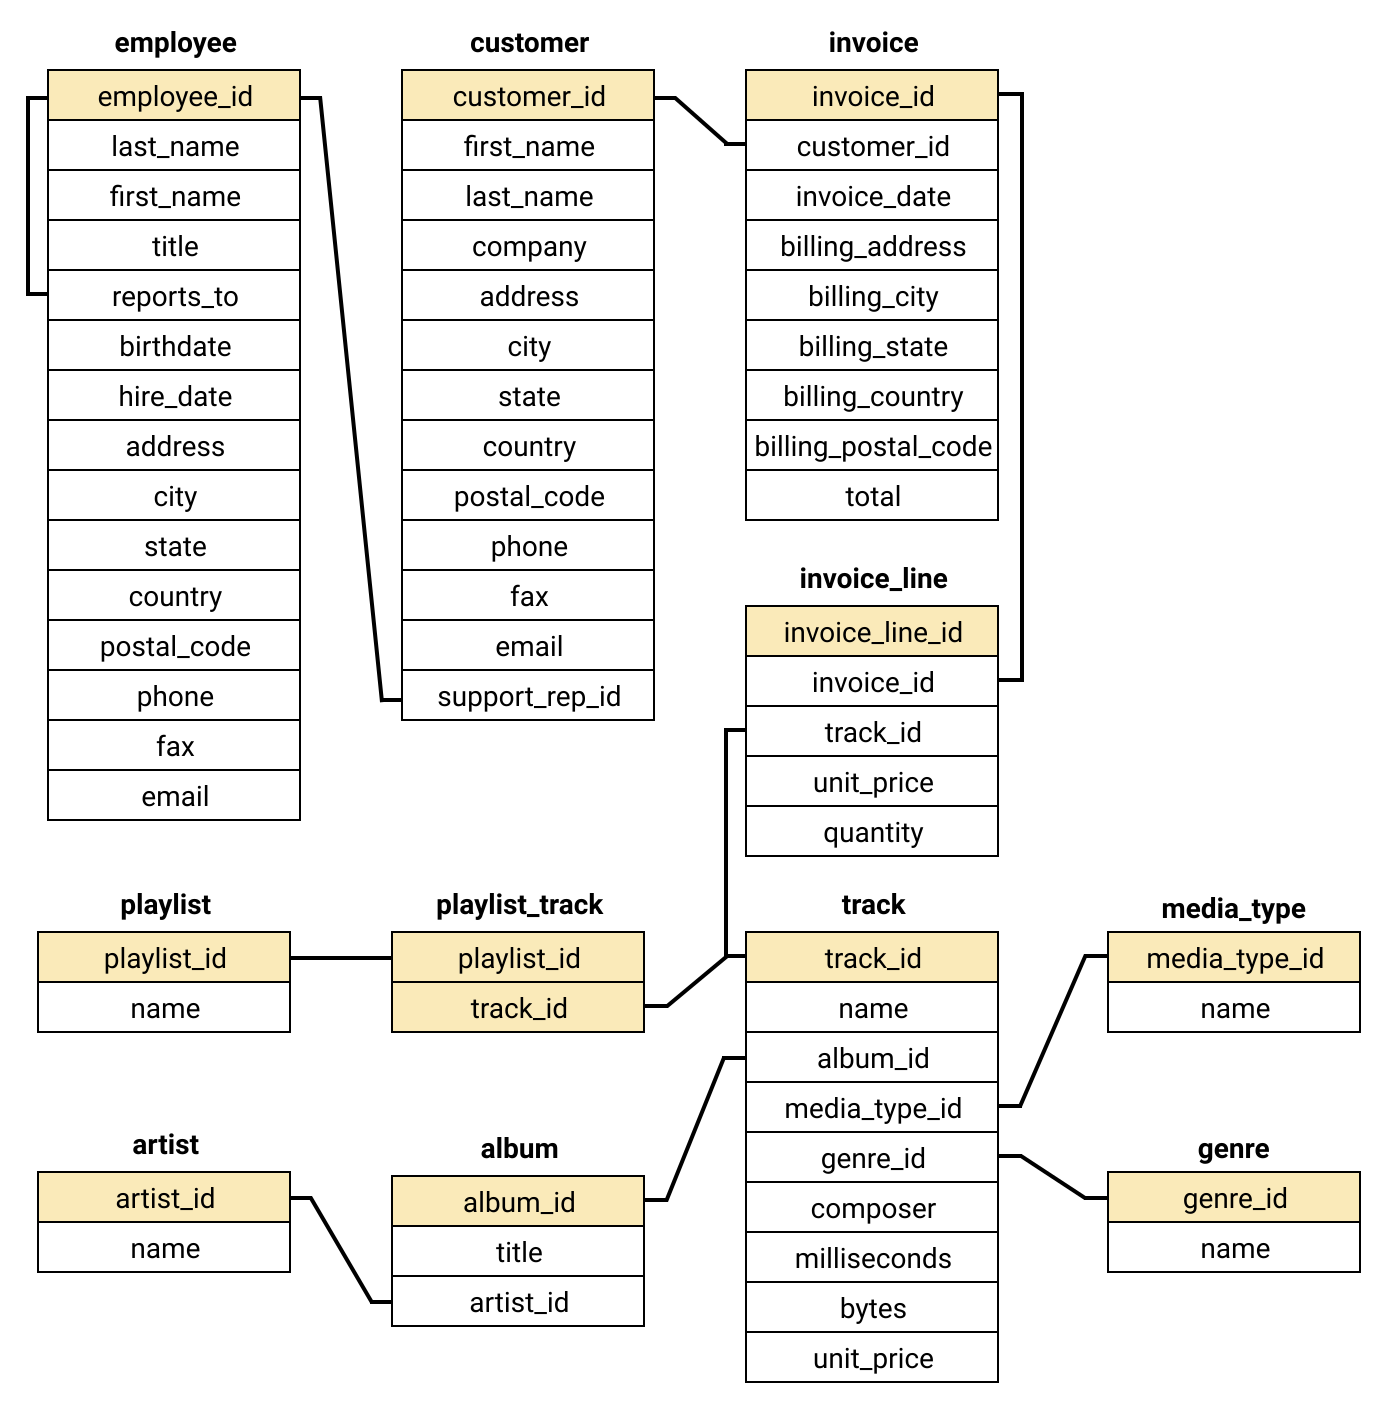

In [51]:
show_svg('/content/drive/MyDrive/my_datasets/svg/chinook-schema.svg')

## Writing Readable Queries

One obvious area when it comes to writing queries is the use of **capitalization and whitespace**. Because white space doesn't have any meaning in SQL, it can be used to help convey meaning in a complex query. Let's compare the same query written twice— first without whitespace and capitalization:
```
select ta.artist_name artist, count(*) tracks_sold from invoice_line il
inner join (select t.track_id, ar.name artist_name from track t
inner join album al on al.album_id = t.album_id
inner join artist ar on ar.artist_id = al.artist_id) ta
on ta.track_id = il.track_id group by 1 order by 2 desc limit 10;
```

And now, with whitespace and capitalization:
```
SELECT
    ta.artist_name artist,
    COUNT(*) tracks_sold
FROM invoice_line il
INNER JOIN (
            SELECT
                t.track_id,
                ar.name artist_name
            FROM track t
            INNER JOIN album al ON al.album_id = t.album_id
            INNER JOIN artist ar ON ar.artist_id = al.artist_id
           ) ta
           ON ta.track_id = il.track_id
GROUP BY 1
ORDER BY 2 DESC LIMIT 10;
```

As you can see, a little time put into whitespace and capitalization pays off. A few tips to help make your queries more readable:

* If a select statement has more than one column, put each on a new line, indented from the select statement.
* Always capitalize SQL function names and keywords
* Put each clause of your query on a new line.
* Use indenting to make subqueries appear logically separate.

Another important consideration when writing readable queries is the use of **alias names and shortcuts**. Name aliases should be clear– a common convention is using the first letter of the table name, however if you feel that a query is complex you should consider using more explicit aliases. Similarly, at times lines like GROUP BY 1 can be confusing, and explicitly naming the column will make your query more readable.

If you work in a team, you might consider a SQL style guide— a great guide is available at [SQL style guide](https://www.sqlstyle.guide/), but remember that readability is more important than consistency. If you have a complex query and you think breaking the style guide will make it more readable, you should do it.

## The With Clause

When constructing complex queries, it's useful to create an intermediate table to produce our final results. You can use subqueries to create these intermediate tables. Unfortunately, the way subqueries are written makes it harder to read— the person reading the query needs to find the subquery and read from the inside-out.

One way to alleviate this is to use a **with clause**. WITH clauses allow you to define one or more named subqueries before the start of the main query. The main query then refers to the subquery by it's alias name, just as if it's a table in the database.

The syntax for the **WITH** clause is relatively straight-forward.
```
WITH [alias_name] AS ([subquery])
​
SELECT [main_query]
```

Let's look at a simple example, a query designed to gather some info about the tracks from a single album. First, here's our query written with a standard subquery and **no WITH** clause:
```
SELECT * FROM
    (
     SELECT
         t.name,
         ar.name artist,
         al.title album_name,
         mt.name media_type,
         g.name genre,
         t.milliseconds length_milliseconds
     FROM track t
     INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
     INNER JOIN genre g ON g.genre_id = t.genre_id
     INNER JOIN album al ON al.album_id = t.album_id
     INNER JOIN artist ar ON ar.artist_id = al.artist_id
    )
WHERE album_name = "Jagged Little Pill";
```

By moving the subquery before the main query using a **WITH** clause, the intent of the main query becomes much easier to understand.
```
WITH track_info AS
    (                
     SELECT
         t.name,
         ar.name artist,
         al.title album_name,
         mt.name media_type,
         g.name genre,
         t.milliseconds length_milliseconds
     FROM track t
     INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
     INNER JOIN genre g ON g.genre_id = t.genre_id
     INNER JOIN album al ON al.album_id = t.album_id
     INNER JOIN artist ar ON ar.artist_id = al.artist_id
    )

SELECT * FROM track_info
WHERE album_name = "Jagged Little Pill";
```

In [52]:
# Solution
df = pd.read_sql_query('''
WITH playlist_info AS
    (
     SELECT
         p.playlist_id,
         p.name playlist_name,
         t.name track_name,
         (t.milliseconds / 1000) length_seconds
     FROM playlist p
     LEFT JOIN playlist_track pt ON pt.playlist_id = p.playlist_id
     LEFT JOIN track t ON t.track_id = pt.track_id
    )

SELECT
    playlist_id,
    playlist_name,
    COUNT(track_name) number_of_tracks,
    SUM(length_seconds) length_seconds
FROM playlist_info
GROUP BY 1
ORDER BY 1;
''', con)
df

,playlist_id,playlist_name,number_of_tracks,length_seconds
0,1,Music,3290,876049.0
1,2,Movies,0,NaN
2,3,TV Shows,213,500987.0
3,4,Audiobooks,0,NaN
4,5,90’s Music,1477,397970.0
5,6,Audiobooks,0,NaN
6,7,Movies,0,NaN
7,8,Music,3290,876049.0
8,9,Music Videos,1,294.0
9,10,TV Shows,213,500987.0


In [53]:
# Miss results
df = pd.read_sql_query('''
WITH playlist_info AS
    (
     SELECT
        pt.playlist_id,
        p.name playlist_name,
        t.name, 
        CAST(SUM (t.milliseconds/1000) AS FLOAT) length_seconds,
        COUNT(t.track_id) number_of_tracks
     FROM track t
     INNER JOIN playlist_track pt ON pt.track_id = t.track_id
     INNER JOIN playlist p ON p.playlist_id = pt.playlist_id
     GROUP BY pt.playlist_id
    )
SELECT
    playlist_id,
    playlist_name,
    number_of_tracks,
    length_seconds
FROM playlist_info
ORDER BY playlist_id ASC;
''',con)
df

,playlist_id,playlist_name,number_of_tracks,length_seconds
0,1,Music,3290,876049.0
1,3,TV Shows,213,500987.0
2,5,90’s Music,1477,397970.0
3,8,Music,3290,876049.0
4,9,Music Videos,1,294.0
5,10,TV Shows,213,500987.0
6,11,Brazilian Music,39,9464.0
7,12,Classical,75,21736.0
8,13,Classical 101 - Deep Cuts,25,6742.0
9,14,Classical 101 - Next Steps,25,7565.0


## Createing Views

In [54]:
# Delete VIEW
cur = con.cursor()
cur.execute('''
drop VIEW customer_gt_90_dollars;
''')
cur.execute('''
drop VIEW customer_usa;
''')

When we use the **WITH** clause, we're creating a temporary named subquery that we can use only within that query. But what if we find ourselves using the same **WITH** with lots of different queries? It would be nice to permanently define a subquery that we can use again and again.

We do this by creating a **view**, which we can then use in all future queries. An easy way to think of this is the **WITH** clause creates a temporary view. The syntax for creating a view is:
```
CREATE VIEW database.view_name AS
    SELECT * FROM database.table;
``` 

In [55]:
cur = con.cursor()
# Create VIEW
cur.execute('''
CREATE VIEW customer_gt_90_dollars AS
    SELECT 
        c.*
    FROM customer c
    INNER JOIN invoice i ON i.customer_id = c.customer_id
    GROUP BY c.customer_id
    HAVING SUM(i.total) > 90;
''')


In [56]:
df = pd.read_sql_query('''
SELECT *
FROM customer_gt_90_dollars;
''',con)
df

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
2,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
3,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
4,13,Fernanda,Ramos,None,Qe 7 Bloco G,Brasília,DF,Brazil,71020-677,+55 (61) 3363-5547,+55 (61) 3363-7855,fernadaramos4@uol.com.br,4
5,17,Jack,Smith,Microsoft Corporation,1 Microsoft Way,Redmond,WA,USA,98052-8300,+1 (425) 882-8080,+1 (425) 882-8081,jacksmith@microsoft.com,5
6,20,Dan,Miller,None,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,+1 (650) 644-3358,None,dmiller@comcast.com,4
7,21,Kathy,Chase,None,801 W 4th Street,Reno,NV,USA,89503,+1 (775) 223-7665,None,kachase@hotmail.com,5
8,22,Heather,Leacock,None,120 S Orange Ave,Orlando,FL,USA,32801,+1 (407) 999-7788,None,hleacock@gmail.com,4
9,30,Edward,Francis,None,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,+1 (613) 234-3322,None,edfrancis@yachoo.ca,3


## Combining Rows With Union

We have now created two views: **customer_usa** and **customer_gt_90_dollars**. How can we find customers who are in different permutations of these two views:

* Customers in the USA **or have** spent more than $90
* Customers in the USA **and have** spent more than $90
* Customers in the USA **and have** not spent more than $90

These scenarios require a different type of join as we're wanting to join rows from not tables, and not columns. Let's start by looking at just the first scenario, where we want to combine rows that exist in either view.

Where regular joins are used to join columns, the **union** operator is used to join rows from tables and/or views.

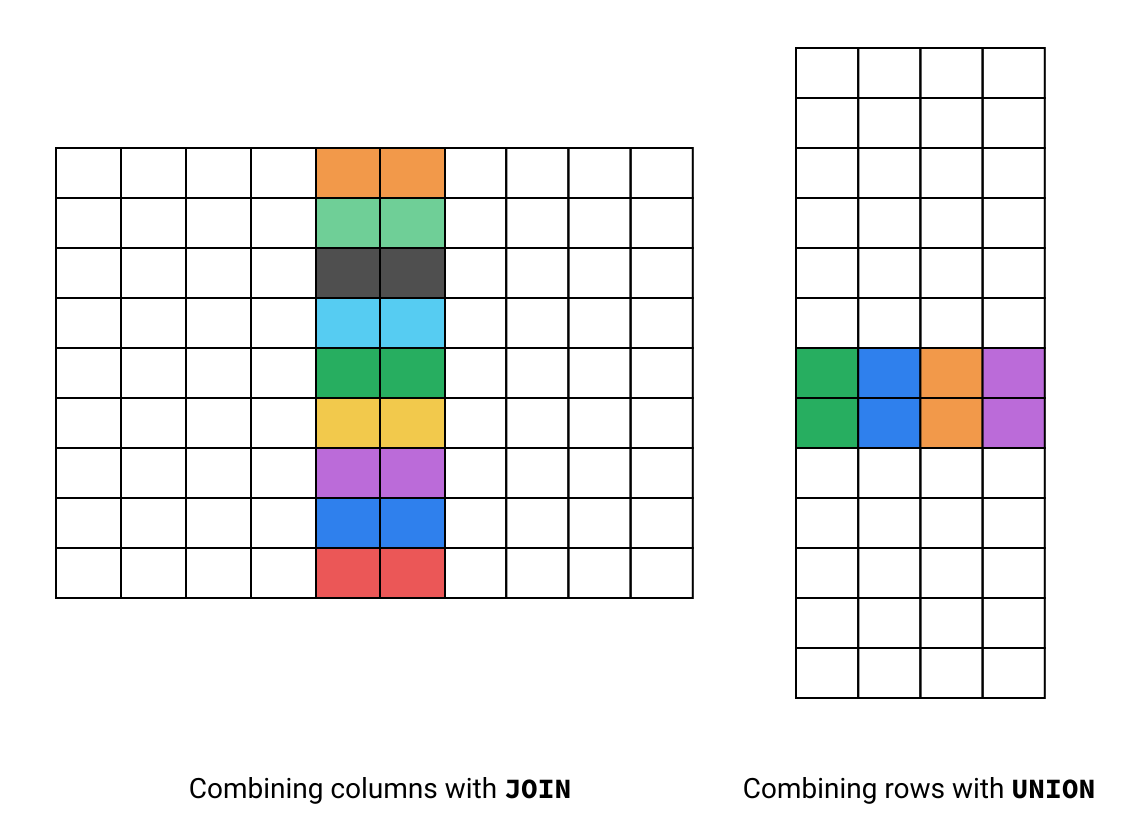

In [57]:
show_svg('/content/drive/MyDrive/my_datasets/svg/union_vs_join.svg')

The syntax for the union operator is composed of two or more SELECT statements:
```
[select_statement_one]
UNION
[select_statement_two]
```

Rather than using the **ON** keyword, the statements before and after **UNION** must have the same number of columns, with compatible types in order. We'll learn more about types in a later mission, but as an example, **FLOAT** and **INT** are compatible types, but **FLOAT** and **TEXT** are not).



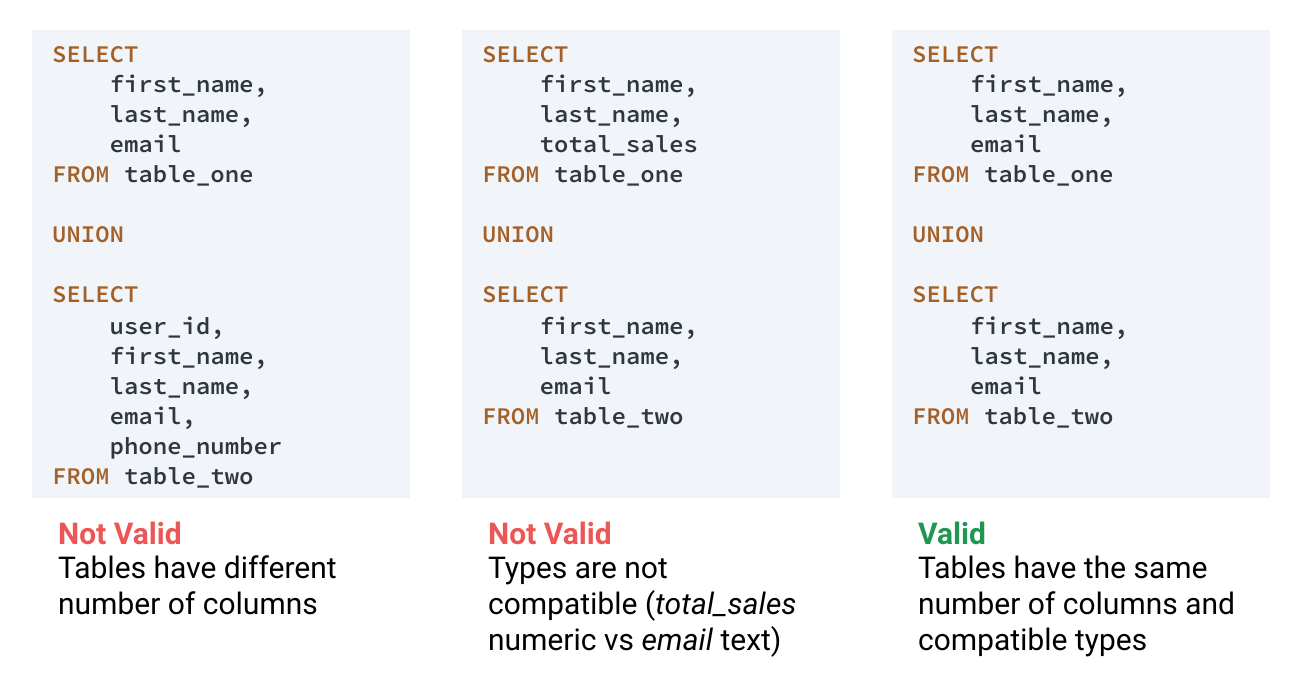

In [58]:
show_svg('/content/drive/MyDrive/my_datasets/svg/union_types.svg')

In [59]:
cur.execute('''
CREATE VIEW customer_usa AS 
SELECT * 
FROM customer
WHERE country = "USA";''')

In [60]:
df = pd.read_sql_query('''
SELECT * 
FROM customer_usa
UNION
SELECT *
FROM customer_gt_90_dollars;
''', con)
df

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
2,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
3,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
4,13,Fernanda,Ramos,None,Qe 7 Bloco G,Brasília,DF,Brazil,71020-677,+55 (61) 3363-5547,+55 (61) 3363-7855,fernadaramos4@uol.com.br,4
5,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,+1 (650) 253-0000,fharris@google.com,4
6,17,Jack,Smith,Microsoft Corporation,1 Microsoft Way,Redmond,WA,USA,98052-8300,+1 (425) 882-8080,+1 (425) 882-8081,jacksmith@microsoft.com,5
7,18,Michelle,Brooks,None,627 Broadway,New York,NY,USA,10012-2612,+1 (212) 221-3546,+1 (212) 221-4679,michelleb@aol.com,3
8,19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,+1 (408) 996-1011,tgoyer@apple.com,3
9,20,Dan,Miller,None,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,+1 (650) 644-3358,None,dmiller@comcast.com,4


## Combining Rows Using Intersect and Except

The three scenarios we discussed at the start of the previous screen were:

* Customers who are in the USA **or have** spent more than \$90
* Customers who are in the USA **and have** spent more than \$90
* Customers who are in the USA **and have not** spent more than \$90
We just successfully used UNION for the first, but what about the other two? There are two other operators that will help us with these - **intersect** and **except**. Combined, these three operators allow us to perform set operations in SQL. Here's a diagram and explanation of how these compare with union.

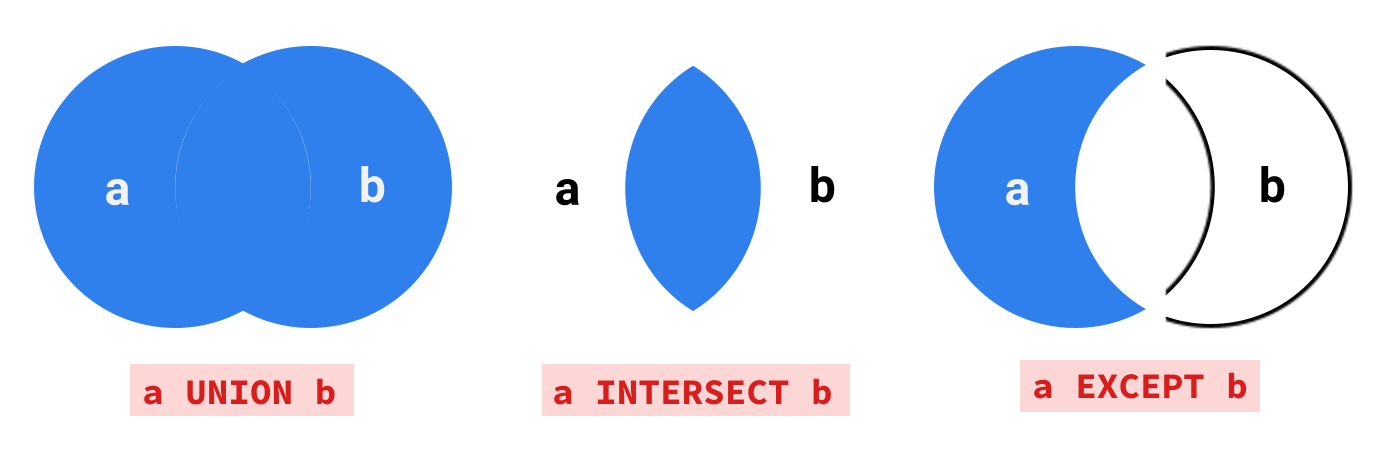

In [61]:
show_svg('/content/drive/MyDrive/my_datasets/svg/set_operations.svg')

|  **Operator** |                                     **What it Does**                                     | **Python Equivalent** |
|:-------------|:----------------------------------------------------------------------------------------|:---------------------|
| **UNION**     | Selects rows that occur in either statement.                                             | **or**                |
| **INTERSECT** | Selects rows that occur in both statements.                                              | **and**               |
| **EXCEPT**    | Selects rows that occur in the first statement, but don't occur in the second statement. | **and not**           |

1. Write a query that works out how many customers that are in the USA and have purchased more than \$90 are assigned to each sales support agent. For the purposes of this exercise, no two employees have the same name.
* Your result should have the following columns, in order:
* **employee_name** - The first_name and last_name of the employee separated by a space, eg **Luke Skywalker**.
* **customers_usa_gt_90** - The number of customers assigned to that employee that are both from the USA and have have purchased more than $90 worth of tracks.
* The result should include all employees with the title "Sales Support Agent", but not employees with any other title.
* Order your results by the **employee_name** column.

In [62]:
df = pd.read_sql_query('''
WITH customer_usa_gt_90 AS
    (
     SELECT * FROM customer_usa
     
     INTERSECT

     SELECT * FROM customer_gt_90_dollars
    )

SELECT 
    e.first_name || " " || e.last_name employee_name,
    COUNT(c.customer_id) customer_usa_gt_90
FROM employee e
LEFT JOIN customer_usa_gt_90 c ON c.support_rep_id = e.employee_id
WHERE e.title = "Sales Support Agent"
GROUP BY 1
ORDER BY 1;
''',con)
df

,employee_name,customer_usa_gt_90
0,Jane Peacock,0
1,Margaret Park,2
2,Steve Johnson,2


## Multiple Named Subqueries

When we learned about **WITH**, we said with *clauses allow you to define one or more named subqueries*, but we didn't show you the syntax for creating more than one named subquery. To do this, you use a single **WITH** clause and multiple, comma-separated alias/subquery pairs:
```
WITH
    [alias_name] AS ([subquery]),
    [alias_name_2] AS ([subquery_2]),
    [alias_name_3] AS ([subquery_3])

SELECT [main_query]
```

1. Write a query that uses multiple named subqueries in a WITH clause to gather total sales data on customers from India:
* The first named subquery should return all customers that are from India.
* The second named subquery should calculate the sum total for every customer.
* The main query should join the two named subqueries, resulting in the following final columns:
 * **customer_name** - The first_name and last_name of the customer, separated by a space, eg **Luke Skywalker**.
 * **total_purchases** - The total amount spent on purchases by that customer.
* The results should be sorted by the **customer_name** column in alphabetical order.

In [63]:
df = pd.read_sql_query('''
WITH 
    customer_india AS 
        (
         SELECT *
         FROM customer
         WHERE country = "India"
        ),
    sale_per_customer AS
        (
         SELECT
            i.customer_id,
            SUM(i.total) total_purchases
         FROM invoice i 
         GROUP BY i.customer_id
        )

SELECT 
    c.first_name || " " || c.last_name customer_name,
    s.total_purchases total_purchases
FROM customer_india c
INNER JOIN sale_per_customer s ON s.customer_id = c.customer_id 
ORDER BY 1;
''',con)
df

,customer_name,total_purchases
0,Manoj Pareek,111.87
1,Puja Srivastava,71.28


## Challenge: Each Country's Best Customer

In [64]:
# Solution 1
df = pd.read_sql_query('''
WITH 
    customer_each_country AS
        (
         SELECT *
         FROM customer   
        ),
    sales_per_customer AS
        (
         SELECT
            i.customer_id, 
            SUM(i.total) total_purchased
         FROM invoice i
         GROUP BY i.customer_id
        )
SELECT 
    c.country country,
    c.first_name || " " || c.last_name customer_name,
    s.total_purchased total_purchased
FROM customer c
INNER JOIN sales_per_customer s ON s.customer_id = c.customer_id
GROUP BY c.country
HAVING MAX(total_purchased)
ORDER BY 1; 
''',con)
df

,country,customer_name,total_purchased
0,Argentina,Diego Gutiérrez,39.60
1,Australia,Mark Taylor,81.18
2,Austria,Astrid Gruber,69.30
3,Belgium,Daan Peeters,60.39
4,Brazil,Luís Gonçalves,108.90
5,Canada,François Tremblay,99.99
6,Chile,Luis Rojas,97.02
7,Czech Republic,František Wichterlová,144.54
8,Denmark,Kara Nielsen,37.62
9,Finland,Terhi Hämäläinen,79.20


In [65]:
# Solution 2
df = pd.read_sql_query('''
WITH
    customer_country_purchases AS
        (
         SELECT
             i.customer_id,
             c.country,
             SUM(i.total) total_purchases
         FROM invoice i
         INNER JOIN customer c ON i.customer_id = c.customer_id
         GROUP BY 1, 2
        ),
    country_max_purchase AS
        (
         SELECT
             country,
             MAX(total_purchases) max_purchase
         FROM customer_country_purchases
         GROUP BY 1
        ),
    country_best_customer AS
        (
         SELECT
            cmp.country,
            cmp.max_purchase,
            (
             SELECT ccp.customer_id
             FROM customer_country_purchases ccp
             WHERE ccp.country = cmp.country AND cmp.max_purchase = ccp.total_purchases
            ) customer_id
         FROM country_max_purchase cmp
        )
SELECT
    cbc.country country,
    c.first_name || " " || c.last_name customer_name,
    cbc.max_purchase total_purchased
FROM customer c
INNER JOIN country_best_customer cbc ON cbc.customer_id = c.customer_id
ORDER BY 1 ASC
''',con)
df

,country,customer_name,total_purchased
0,Argentina,Diego Gutiérrez,39.60
1,Australia,Mark Taylor,81.18
2,Austria,Astrid Gruber,69.30
3,Belgium,Daan Peeters,60.39
4,Brazil,Luís Gonçalves,108.90
5,Canada,François Tremblay,99.99
6,Chile,Luis Rojas,97.02
7,Czech Republic,František Wichterlová,144.54
8,Denmark,Kara Nielsen,37.62
9,Finland,Terhi Hämäläinen,79.20


# Table Relations and Normalization

## The SQLite Shell

In [66]:
cd /content/drive/MyDrive/my_datasets/Intermediate SQL for Data Analysis

/content/drive/MyDrive/my_datasets/Intermediate SQL for Data Analysis


1. Launch the SQLite shell, connecting to the chinook.db database file.
2. Use .tables to display the tables in the Chinook database.
3. Use dot commands to turn headers on, and set the mode to 'column'.
4. Write a query on one of the tables in the chinook.db database.
5.Display the help text.
6. Run .shell clear to see what it does.
7. Quit the SQLite shell.

In [67]:
# 1. sqlite3 chinook.db
# 2. .tables
# 3. .headers on
# 4.  SELECT * FROM track;
# 5. .help
# 6. .shell clear
# 7. quit

## Creating Tables 

Now that we've learned the basics of the SQLite shell, let's learn how to create a database table. Here's the syntax for CREATE TABLE:
```
CREATE TABLE [table_name] (
    [column1_name] [column1_type],
    [column2_name] [column2_type],
    [column3_name] [column3_type],
    [...]
);
```

| Type    | Commonly Used For                                   | Equivalent Types                          |
|---------|-----------------------------------------------------|-------------------------------------------|
| TEXT    | Names Email Addresses Dates and Times Phone Numbers | CHARACTER VARCHAR NCHAR NVARCHAR DATETIME |
| INTEGER | IDs Quantities                                      | INT SMALLINT BIGINT INT8                  |
| REAL    | Weights Averages                                    | DOUBLE FLOAT                              |
| NUMERIC | Prices Statuses                                     | DECIMAL BOOLEAN                           |
| BLOB    | Binary Data                                         | BLOB                                      |

Just like with views, if you try to create a table that already exists you will get an error. If you make a mistake when you create a table, you can use the DROP statement to remove the table so you can create it again:
```
DROP TABLE [table_name];
```
You can also use the SQLite dot command **.schema [table_name]** to view the schema for a table you have just created to check where you might have gone wrong.

## Primary and Foreign Keys

Primary key:
```
CREATE TABLE user (
    user_id INTEGER PRIMARY KEY,
    first_name TEXT,
    last_name TEXT
);
```

Foreign Keys:
By defining a foreign key, our database engine will prevent us from adding rows where the foreign key value doesn't exist in the other table, which helps to prevent errors in our data (note that by default SQLite doesn't force foreign key constraints, however we have [changed the default](https://stackoverflow.com/questions/15301643/sqlite3-forgets-to-use-foreign-keys/44857286#44857286) for this mission).
```
CREATE TABLE purchase (
    purchase_id INTEGER PRIMARY KEY,
    user_id INTEGER,
    purchase_date TEXT,
    total NUMERIC,
    FOREIGN KEY (user_id) REFERENCES user(user_id)
);
```

## Database Normalization

When we created our **wishlist** table, we didn't include a track_id column to store which tracks are in the users wishlist. To understand why, let's take a look at what the table might look like if we stored all the data in a single table.

| wishlist_id | customer_id |           name          | track_id |
|:-----------:|:-----------:|:-----------------------:|:--------:|
| 1           | 34          | Joao's awesome wishlist | 1158     |
| 1           | 34          | Joao's awesome wishlist | 2646     |
| 1           | 34          | Joao's awesome wishlist | 1990     |
| 2           | 18          | Amy loves pop           | 3272     |
| 2           | 18          | Amy loves pop           | 3470     |

There are are some drawbacks to storing the data this way:

* **Data Duplication** - we are storing the name of each wishlist multiple times.
* **Data Modification** - if we want to change the name of one of the wishlists, we have to modify multiple rows.
* **Data Integrity** - There is nothing to stop a row being added with the wrong wishlist name, and if that happened we wouldn't know which was the correct name.

The process of optimizing the design of databases to minimize these issues is called database normalization. In database normalization theory, there are several different phases of normalization, known as [normal forms](http://www.bkent.net/Doc/simple5.htm). Knowing each normal form is not as important as understanding the goals of normalization, and designing your databases to avoid data duplication and integrity issues. We'll learn more about database normalization in the next mission, however for now let's look at how we can design our wishlist tables with normalization in mind:

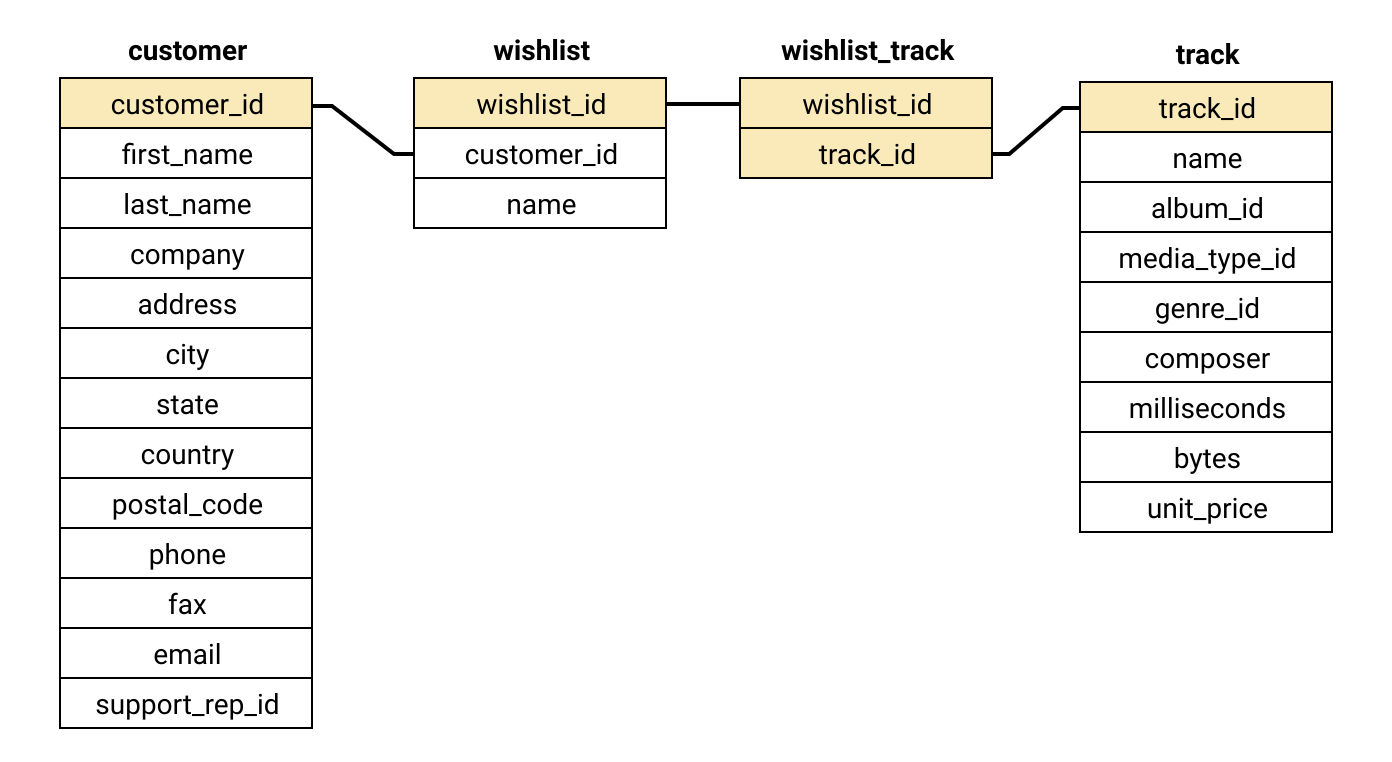

In [68]:
show_svg('/content/drive/MyDrive/my_datasets/svg/wishlist_2.svg')

In addition to the **wishlist** table we made in the previous screen, we have added a new **wishlist_track** table and shown its relationship to the existing track table. The **wishlist_track** table has two columns that are both yellow to indicate that they're primary keys, since neither column will uniquely identify each row by itself. When two or more columns combine to form a primary key it is called a **compound primary key**. To create a compound primary key, you use the **PRIMARY KEY** clause:
```
CREATE TABLE [table_name] (
    [column_one_name] [column_one_type],
    [column_two_name] [column_two_type],
    [column_three_name] [column_three_type],
    [column_four_name] [column_four_type],
    PRIMARY KEY (column_one_name, column_two_name)
);
```

## Inserting and Deleting Rows

Now that we've created the tables to hold our wishlist data, let's add some rows to those tables. To add rows to a SQL table, we'll use the **INSERT** statement:
```
CREATE TABLE [table_name] (
    [column_one_name] [column_one_type],
    [column_two_name] [column_two_type],
    [column_three_name] [column_three_type],
    [column_four_name] [column_four_type],
    PRIMARY KEY (column_one_name, column_two_name)
);
INSERT INTO [table_name] (
    [column1_name],
    [column2_name],
    [column3_name]
) VALUES (
    [value1],
    [value2],
    [value3]
);
```
If you are inserting values into every column in a table, you don't need to list the column names:
```
INSERT INTO [table_name] VALUES ([value1], [value2], [value3])
INSERT INTO [table_name] VALUES ([value1], [value2], [value3]);
```
Additionally, you can insert multiple rows in a single statement:
```
INSERT INTO [table_name]
VALUES
    ([value1], [value2], [value3]),
    ([value4], [value5], [value6]),
    [...]
INSERT INTO [table_name]
VALUES
    ([value1], [value2], [value3]),
    ([value4], [value5], [value6]),
    [...]
```

If you make an error while inserting new rows, you'll need to use the **DELETE** statement to remove all rows:
```
DELETE FROM [table_name]
```
Or use it with a where statement to remove selected rows:
```
DELETE FROM [table_name]
WHERE [expression];
```

## Adding Columns to a Table

We'll need to add a column to each of our tables. We can use the ALTER statement to do this.
```
ALTER TABLE [table_name]
ADD COLUMN [column_name] [column_type];
```


As we learned earlier, SQLite supports only five basic types - the closest thing to a boolean type is **NUMERIC**, where the values **1** and **0** will represent true and false respectively. Let's create active columns for both of our wishlist tables.

## Adding Values to Existing Rows

We've added our columns to both wishlist tables, but currently they don't have any data in them. To change values for existing rows, we use the UPDATE statement:
```
UPDATE [table_name]
SET [column_name] = [expression]
WHERE [expression]
``


The **WHERE** clause is optional, and can contain any expression that would be valid in a **SELECT** statement.

There are several variations we can use for our **SET** clause. First we can use a single value:
```
UPDATE customer
SET phone = "+55 (12) 3921-4464"
WHERE customer_id = 1
```
We can use a subquery that returns a single value:
```
UPDATE track
SET unit_price = (
                    SELECT AVG(unit_price)
                    FROM track
                 )
```
We can use a column, or function on an existing column:
```
UPDATE track
SET unit_price = unit_price * 1.1
```
Lastly, we can set more than one column at once:
```
UPDATE wishlist_track
SET
    active = 1,
    purchased = 0;
```
Because our active columns will store a **1** for true and **0** for false, we'll set the values to 1 for every row.

## Challenge: Adding Sales Tax Capabilities

# Queryring SQLite from Python 

## Overview

SQLite is a database that doesn't require a standalone server; it stores the entire database as a file on disk. This makes it ideal for working with larger datasets that can fit on disk but not in memory.

Python loads the entire data set we're working with into memory, making SQLite a good alternative when working with data sets larger than 8 gigabytes. Because a singlefile can contain an entire database, it's easier to share; some data-sets are available online as SQLite database files (using the extension **.db**).

There are two primary ways to interact with a SQLite database:

* [sqlite3 Python module](https://docs.python.org/3/library/sqlite3.html)

* [SQLite shell](https://sqlite.org/cli.html)

In this mission, we'll learn how to use the sqlite3 module.

## Introduction to the Data

As we did in previous SQL missions, we'll continue to work with the American Community Survey data on college majors and job outcomes, which looks like this:

| Rank | Major_code |                   Major                   | Major_category | Total | Sample_size |  Men  | Women | ShareWomen | Employed |
|:----|:----------|:-----------------------------------------|:--------------|:-----|:-----------|:-----|:-----|:----------|:--------|
| 1    | 2419       | PETROLEUM ENGINEERING                     | Engineering    | 2339  | 36          | 2057  | 282   | 0.120564   | 1976     |
| 2    | 2416       | MINING AND MINERAL ENGINEERING            | Engineering    | 756   | 7           | 679   | 77    | 0.101852   | 640      |
| 3    | 2415       | METALLURGICAL ENGINEERING                 | Engineering    | 856   | 3           | 725   | 131   | 0.153037   | 648      |
| 4    | 2417       | NAVAL ARCHITECTURE AND MARINE ENGINEERING | Engineering    | 1258  | 16          | 1123  | 135   | 0.107313   | 758      |
| 5    | 2405       | CHEMICAL ENGINEERING                      | Engineering    | 32260 | 289         | 21239 | 11021 | 0.341631   | 25694    |

Here are the descriptions for the columns in the preview:

* **Rank**: the major's rank according to median earnings
* **Major_code**: the major's code or ID
* **Major**: the name of the major
* **Major_category**: the broader category of the major
* **Total**: the total number of people who studied the major
* **Sample_size**: the sample size (unweighted) of graduates with full time jobs
* **Men**: the number of graduates who are men
* **Women**: the number of graduates who are women
* **ShareWomen**: women as a proportion of the total number of graduates (a number ranging from 0 to 1)
* **Employed**: the number of employed graduates

We've loaded a subset of the data into a table named **recent_grads** in a database. The database file we'll be working with is called **jobs.db**.

## Connecting to the Database

In [69]:
import sqlite3
conn = sqlite3.connect('/content/drive/MyDrive/my_datasets/Intermediate SQL for Data Analysis/jobs.db')
print('Connected Database')

Connected Database


## Introduction to Cursor Objects and Tuples

Before we can execute a query, we need to express our SQL query as a string. While we use the Connection class to represent the database we're working with, we use the [Cursor class](https://docs.python.org/3/library/sqlite3.html#cursor-objects) to do the following:

* Run a query against the database
* Parse the results from the database
* Convert the results to native Python objects
* Store the results within the Cursor instance as a local variable

After running a query and converting the results to a list of tuples, the Cursor instance stores the list as a local variable. Before we look at the syntax of querying the database, let's review *tuples*.

## Working With Sequences of Values as Tuples

A *tuple* is a core data structure that Python uses to represent a sequence of values, similar to a list. Unlike *lists*, tuples are **immutable**, which means we can't modify existing ones. Python represents each row in the results set as a *tuple*.

To create an empty tuple, assign a pair of empty parentheses to a variable:
```
t = ()
```
Python indexes *Tuples* from **0** to **n-1**, just like it does with *lists*. We access the values in a tuple using bracket notation.
```
t = ('Apple', 'Banana')
apple = t[0] 
banana = t[1]
```
*Tuples* are faster than *lists*, so they're helpful with larger databases and larger results sets.

Next, let's look at how to use the Cursor instance to query the database.

Write a query that returns all of the values in the **Major** column from the **recent_grads** table.

In [70]:
# Creating a Cursor instance
cursor = conn.cursor()
# SQL Query as a string
query = "select Major from recent_grads;"
# Execute the query, convert the results to tuples, and store as a local variable
cursor.execute(query)
# Fetch the full results set as a list of tuples
majors = cursor.fetchall()
# Display the first three results
majors[0:3]

[('PETROLEUM ENGINEERING',),
 ('MINING AND MINERAL ENGINEERING',),
 ('METALLURGICAL ENGINEERING',)]

## Execute as a Shortcut for Running a Query

So far, we've run queries by creating a Cursor instance, and then calling the **execute** method on the instance. The SQLite library actually allows us to skip creating a Cursor altogether by using the [execute method](https://docs.python.org/3/library/sqlite3.html#sqlite3.Connection.execute) within the Connection object itself. SQLite will create a Cursor instance for us under the hood and run our query against the database, allowing us to skip a step. Here's how the code looks:
```
conn = sqlite3.connect("jobs.db")
query = "select * from recent_grads;"
conn.execute(query).fetchall()
```
Notice that we didn't explicitly create a separate Cursor instance ourselves in this code example.

Now let's learn how to fetch a specific number of results after we run a query.

## Fetching a Specific Number of Results

To simplify working with large results sets, the Cursor class allows us to control the number of results we want to retrieve. To return a single result (as a *tuple*), we use the [Cursor method fetchone()](https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor.fetchone). To return n results, we use the [Cursor method fetchmany()](https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor.fetchmany).

Each Cursor instance contains an internal counter that updates every time we retrieve results. When we call the **fetchone()** method, the Cursor instance will return a single result, and then increment its internal counter by 1. This means that if we call **fetchone()** again, the Cursor instance will actually return the second tuple in the results set (and increment by 1 again).

The **fetchmany()** method takes in an integer **(n)** and returns the corresponding results, starting from the current position. It then increments the Cursor instance's counter by **n**

1. Write and run a query that returns the **Major** and **Major_category** columns from **recent_grads**.
Fetch the first five results and store them as **five_results**.

In [71]:
cursor = conn.cursor()
query = "select Major, Major_category from recent_grads;"
cursor.execute(query)
five_results = cursor.fetchmany(5)
five_results

[('PETROLEUM ENGINEERING', 'Engineering'),
 ('MINING AND MINERAL ENGINEERING', 'Engineering'),
 ('METALLURGICAL ENGINEERING', 'Engineering'),
 ('NAVAL ARCHITECTURE AND MARINE ENGINEERING', 'Engineering'),
 ('CHEMICAL ENGINEERING', 'Engineering')]

## Closing the Database Connection

Because SQLite restricts access to the database file when we're connected to a database, we need to close the connection when we're done working with it. Closing the connection allows other processes to access the database, which is important when you're in a production environment and working with other team members.

To close a connection to a database, use the Connection instance method **close()**. When we're working with multiple databases and multiple Connection instances, we want to make sure we call the **close()** method on the correct instance. After you close the connection, attempting to query the database using any linked Cursor instances will return the following error:
```
ProgrammingError: Cannot operate on a closed database.
```

1. Close the connection to the database using the Connection instance method **close().**

In [72]:
conn.close()
print("Close the connection to database")

Close the connection to database


## Practice 

1. Connect to the database **jobs2.db**, which contains the same data as **jobs.db**.
2. Write and execute a query that returns all of the majors (**Major**) in reverse alphabetical order (Z to A).
3. Assign the full result set to reverse_alphabetical.
4. Finally, close the connection to the database.

In [73]:
conn = sqlite3.connect("/content/drive/MyDrive/my_datasets/Intermediate SQL for Data Analysis/jobs2.db")
reverse_alphabetical = conn.execute("select Major from  recent_grads order by Major DESC;").fetchall()
conn.close()
reverse_alphabetical

[('ZOOLOGY',),
 ('VISUAL AND PERFORMING ARTS',),
 ('UNITED STATES HISTORY',),
 ('TREATMENT THERAPY PROFESSIONS',),
 ('TRANSPORTATION SCIENCES AND TECHNOLOGIES',),
 ('THEOLOGY AND RELIGIOUS VOCATIONS',),
 ('TEACHER EDUCATION: MULTIPLE LEVELS',),
 ('STUDIO ARTS',),
 ('STATISTICS AND DECISION SCIENCE',),
 ('SPECIAL NEEDS EDUCATION',),
 ('SOIL SCIENCE',),
 ('SOCIOLOGY',),
 ('SOCIAL WORK',),
 ('SOCIAL SCIENCE OR HISTORY TEACHER EDUCATION',),
 ('SOCIAL PSYCHOLOGY',),
 ('SECONDARY TEACHER EDUCATION',),
 ('SCIENCE AND COMPUTER TEACHER EDUCATION',),
 ('SCHOOL STUDENT COUNSELING',),
 ('PUBLIC POLICY',),
 ('PUBLIC ADMINISTRATION',),
 ('PSYCHOLOGY',),
 ('PRE-LAW AND LEGAL STUDIES',),
 ('POLITICAL SCIENCE AND GOVERNMENT',),
 ('PLANT SCIENCE AND AGRONOMY',),
 ('PHYSIOLOGY',),
 ('PHYSICS',),
 ('PHYSICAL SCIENCES',),
 ('PHYSICAL FITNESS PARKS RECREATION AND LEISURE',),
 ('PHYSICAL AND HEALTH EDUCATION TEACHING',),
 ('PHILOSOPHY AND RELIGIOUS STUDIES',),
 ('PHARMACY PHARMACEUTICAL SCIENCES AND ADMINIST